# Code For Artificial Analysis Data

In [1]:
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
#I want to plot output price vs release date
import matplotlib.pyplot as plt

#read in csv file and convert to pandas dataframe
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.api as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression, QuantileRegressor



Index(['Model', 'Creator', 'License', 'Context\nWindow',
       'Artificial Analysis\nIntelligence Index',
       'MMLU-Pro (Reasoning & Knowledge)',
       'GPQA Diamond (Scientific Reasoning)',
       'Humanity's Last Exam (Reasoning & Knowledge)',
       'LiveCodeBench (Coding)', 'SciCode (Coding)', 'HumanEval (Coding)',
       'MATH-500 (Quantitative Reasoning)', 'AIME 2024 (Competition Math)',
       'Multilingual Index (Artificial Analysis)', 'Chatbot Arena',
       'Blended\nUSD/1M Tokens', 'Input Price\nUSD/1M Tokens',
       'Output Price\nUSD/1M Tokens', 'Median\nTokens/s', 'P5\nTokens/s',
       'P25\nTokens/s', 'P75\nTokens/s', 'P95\nTokens/s',
       'Median\nFirst Chunk (s)', 'First Answer\nToken (s)',
       'P5\nFirst Chunk (s)', 'P25\nFirst Chunk (s)', 'P75\nFirst Chunk (s)',
       'P95\nFirst Chunk (s)', 'Total\nResponse (s)', 'Reasoning\nTime (s)',
       'Further\nAnalysis', 'Release Date', 'Parameter Count #Solid',
       'Parameter Count', 'Chinese', 'MOE', 'Sour

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/2658916972.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


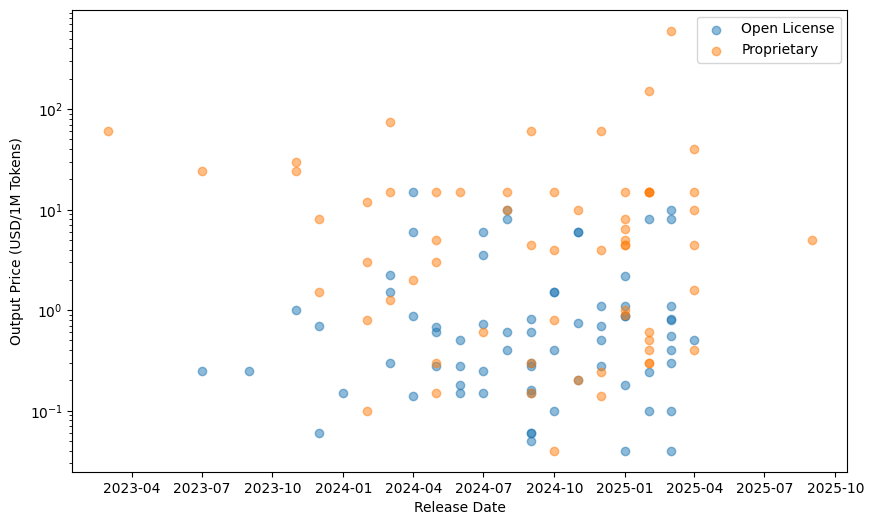

In [2]:

df = pd.read_csv('art_analysis_scrape.csv')

#print the first 5 rows of the dataframe
# print(df.head())
print(df.columns)

# Convert 'release_date' to datetime if it's not already
#filter out nan values  

#filter based on 
df = df[df['Output Price\nUSD/1M Tokens'].notna()]
df = df[df['Release Date'].notna()]
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Convert price to float - handle the case where it might not be a string
# First check if the column contains strings
if df['Output Price\nUSD/1M Tokens'].dtype == 'object':
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
else:
    # If it's already numeric, just ensure it's float type
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].astype(float)

#collect output price for models with open licenses
open_license_df = df[df['License'] == 'Open']
proprietary_df = df[df['License'] == 'Proprietary']

#plot output price for open and proprietary models
plt.figure(figsize=(10, 6))
plt.scatter(open_license_df['Release Date'], open_license_df['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Open License')
plt.scatter(proprietary_df['Release Date'], proprietary_df['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Proprietary')
plt.xlabel('Release Date')
plt.ylabel('Output Price (USD/1M Tokens)')
plt.yscale('log')
plt.legend()
# Plot output price vs release date
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Date'], df['Output Price\nUSD/1M Tokens'], alpha=0.5)
# plt.xlabel('Release Date')
# plt.ylabel('Output Price (USD/1M Tokens)')

In [3]:
# interesting questions how is the price gap betwene open and proprietar models changing over time?
# how fast are open model prices declining with time?
# how fast are proprietary modle prices declinging with time? normalized by benchmark score
# how are context windows changing over time? between open and proprietary models
# markup differenc for fixed mmlu score 


In [4]:
print(df['Context\nWindow'])

0      200k
1        1m
2        1m
3      200k
4      200k
       ... 
156      1m
157    100k
158    128k
159    128k
160      8k
Name: Context\nWindow, Length: 159, dtype: object


# Trends in Context Length Over Time

                          Model  Creator      License Context\nWindow  \
0                o4-mini (high)      NaN  Proprietary            200k   
1        Gemini 2.5 Pro Preview      NaN  Proprietary              1m   
2  Grok 3 mini Reasoning (high)      NaN  Proprietary              1m   
3                o3-mini (high)      NaN  Proprietary            200k   
4                       o3-mini      NaN  Proprietary            200k   

   Artificial Analysis\nIntelligence Index MMLU-Pro (Reasoning & Knowledge)  \
0                                     70.0                              83%   
1                                     68.0                              86%   
2                                     67.0                              83%   
3                                     66.0                              80%   
4                                     63.0                              79%   

  GPQA Diamond (Scientific Reasoning)  \
0                                 78%   
1   

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/1856297416.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


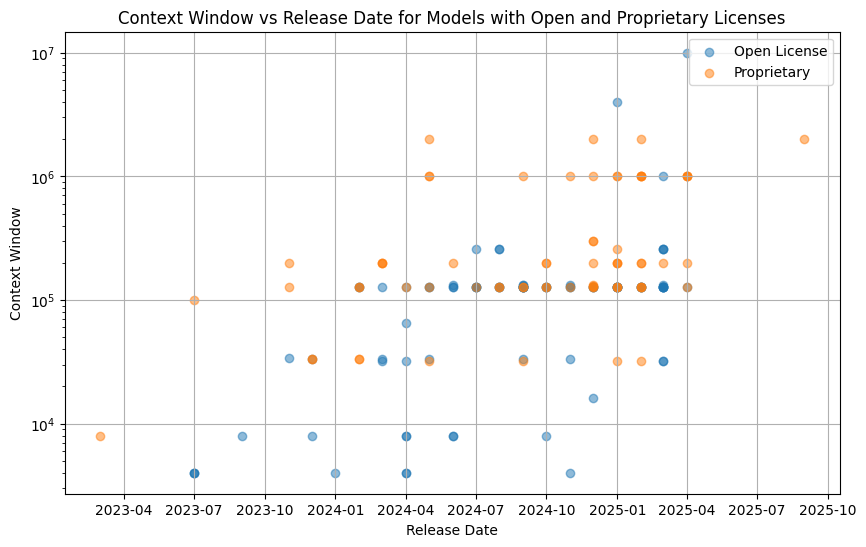

In [5]:
df = pd.read_csv('art_analysis_scrape.csv')

#print the first 5 rows of the dataframe
print(df.head())
df.columns

# Convert 'release_date' to datetime if it's not already
#filter out nan values  

#filter based on 
df = df[df['Context\nWindow'].notna()]
df = df[df['Release Date'].notna()]
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Convert context window to float - handle the case where it might not be a string
# First check if the column contains strings
if df['Context\nWindow'].dtype == 'object':
    # Replace 'k' and 'm' suffixes with their numeric equivalents
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('k', '000').str.replace('m', '000000')
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('$', '').astype(float)
else:
    # If it's already numeric, just ensure it's float type
    df['Context\nWindow'] = df['Context\nWindow'].astype(float)

#collect output price for models with open licenses
open_license_df = df[df['License'] == 'Open']
proprietary_df = df[df['License'] == 'Proprietary']

#plot output price for open and proprietary models
plt.figure(figsize=(10, 6))
plt.scatter(open_license_df['Release Date'], open_license_df['Context\nWindow'], alpha=0.5, label='Open License')
plt.scatter(proprietary_df['Release Date'], proprietary_df['Context\nWindow'], alpha=0.5, label='Proprietary')
plt.xlabel('Release Date')
plt.ylabel('Context Window')
plt.title('Context Window vs Release Date for Models with Open and Proprietary Licenses')
plt.grid(True)
plt.yscale('log')
plt.legend()
# Plot output price vs release date
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Date'], df['Output Price\nUSD/1M Tokens'], alpha=0.5)
# plt.xlabel('Release Date')
# plt.ylabel('Output Price (USD/1M Tokens)')

# Context Length at Fixed Costs

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/3451733950.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


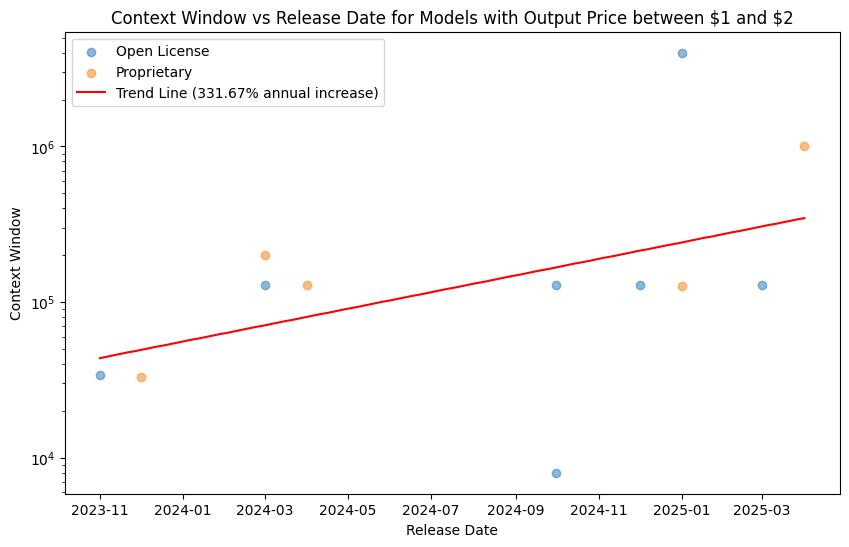

In [6]:
df = pd.read_csv('art_analysis_scrape.csv')
mincost = 1
maxcost = 2
df = df[df['Context\nWindow'].notna()]
df = df[df['Release Date'].notna()]
df['Release Date'] = pd.to_datetime(df['Release Date'])

#filter based on cost

df = df[df['Output Price\nUSD/1M Tokens'].notna()]
#convert$ to float
df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
df = df[df['Output Price\nUSD/1M Tokens'] >= mincost]
df = df[df['Output Price\nUSD/1M Tokens'] <= maxcost]

# Convert context window to float - handle the case where it might not be a string
# First check if the column contains strings
if df['Context\nWindow'].dtype == 'object':
    # Replace 'k' and 'm' suffixes with their numeric equivalents
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('k', '000').str.replace('m', '000000')
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('$', '').astype(float)
else:
    # If it's already numeric, just ensure it's float type
    df['Context\nWindow'] = df['Context\nWindow'].astype(float)

#collect output price for models with open licenses
open_license_df = df[df['License'] == 'Open']
proprietary_df = df[df['License'] == 'Proprietary']

# Convert dates to numeric for regression
df['Date_Numeric'] = pd.to_datetime(df['Release Date']).map(datetime.toordinal)

# Prepare data for regression (using log of context window)
X = df['Date_Numeric'].values.reshape(-1, 1)
y = np.log10(df['Context\nWindow'].values)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Generate points for the regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Convert back to datetime for plotting
x_dates = [datetime.fromordinal(int(x[0])) for x in x_range]

# Calculate percent increase per day
daily_percent_increase = (10**(model.coef_[0]) - 1) * 100
# Calculate annual percent increase (compounded daily)
annual_percent_increase = ((10**(model.coef_[0]))**365 - 1) * 100

#plot output price for open and proprietary models
plt.figure(figsize=(10, 6))
plt.scatter(open_license_df['Release Date'], open_license_df['Context\nWindow'], alpha=0.5, label='Open License')
plt.scatter(proprietary_df['Release Date'], proprietary_df['Context\nWindow'], alpha=0.5, label='Proprietary')
# Plot the regression line
plt.plot(x_dates, 10**y_pred, 'r-', label=f'Trend Line ({annual_percent_increase:.2f}% annual increase)')
plt.xlabel('Release Date')
plt.ylabel('Context Window')
plt.title(f'Context Window vs Release Date for Models with Output Price between \${mincost} and \${maxcost}')
plt.yscale('log')
plt.legend()


In [7]:
# print(df['GPQA Diamond (Scientific Reasoning)'])
# #turn percentage to float
# df['GPQA Diamond (Scientific Reasoning)'] = df['GPQA Diamond (Scientific Reasoning)'].str.replace('%', '').astype(float)

# print(df['GPQA Diamond (Scientific Reasoning)'])

# General Trend for Models

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/3498326320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


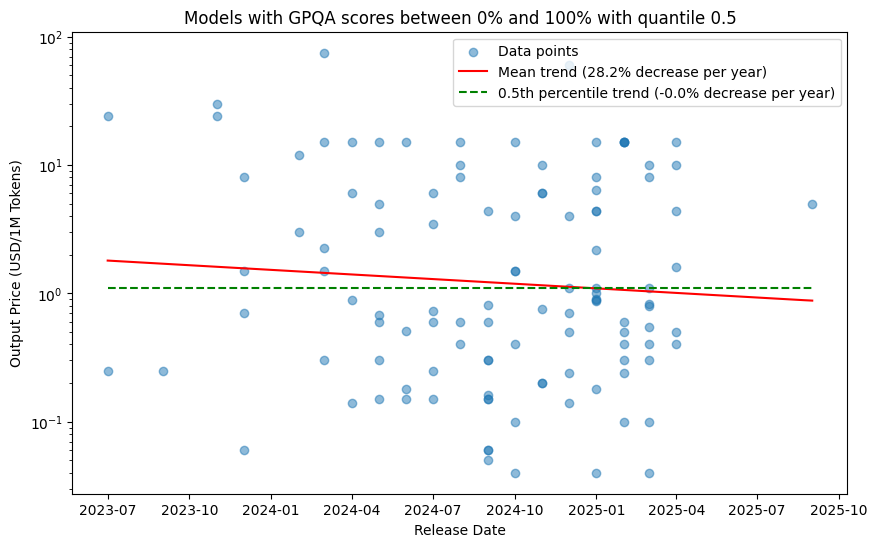

In [8]:
# graph trend in price for models with GPQA in certain range

df = pd.read_csv('art_analysis_scrape.csv')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
upper_level_gp =100
lower_level_gp = 0
quantile = 0.5
benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'

# Drop nan values
df = df[df[benchmark_feature].notna()]
df = df[df['Release Date'].notna()]

# Convert GPQA values to float - handle the case where values are already numeric
# First check if the values are strings or already numeric
if df[benchmark_feature].dtype == 'object':
    # If they're strings, remove the % sign and convert
    df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
else:
    # If they're already numeric, just ensure they're float type
    df[benchmark_feature] = df[benchmark_feature].astype(float)

# Filter based on GPQA - fix the logical operator (use 'and' or '&' with parentheses)
gpqa_df = df[(df[benchmark_feature] >= lower_level_gp) & 
             (df[benchmark_feature] <= upper_level_gp)]

# Convert release date to numeric for regression


# Convert dates to numeric format for regression
gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

# Take log of prices for linear regression, handling zeros and infinities
output_prices = gpqa_df['Output Price\nUSD/1M Tokens']
# Filter out zeros and negative values before taking log
valid_prices = output_prices[output_prices > 0]
gpqa_df_filtered = gpqa_df[output_prices > 0]
log_prices = np.log(valid_prices)

# Check for infinite values and remove them
mask = np.isfinite(log_prices)
gpqa_df_filtered = gpqa_df_filtered[mask]
log_prices = log_prices[mask]

# Fit linear regression model
X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
y = log_prices.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calculate percent decrease per year
# The coefficient represents the change in log price per day
daily_rate = model.coef_[0][0]
# Convert to yearly rate
yearly_rate = daily_rate * 365
# Convert log change to percent change: e^yearly_rate - 1
percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
# Since we expect a decrease, make it positive for reporting
percent_decrease_per_year = -percent_change_per_year

# Generate prediction line
date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
log_price_pred = model.predict(date_range)
price_pred = np.exp(log_price_pred)

# Fit quantile regression for bottom 20 percent
# X_quant = gpqa_df_filtered['Date_Numeric'].values
# y_quant = log_prices.values
# # Add constant properly using numpy instead of sm.add_constant
# X_quant_with_const = np.column_stack((np.ones(len(X_quant)), X_quant))
# quant_model = QuantReg(y_quant, X_quant_with_const)
# quant_result = quant_model.fit(q=quantile)

# ... existing code ...
# Fit quantile regression
X_quant = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)  # Reshape like we did for linear regression
y_quant = log_prices.values.reshape(-1, 1)  # Reshape to match

# Create the quantile regression model
quant_model = QuantReg(y_quant, X_quant)
quant_result = quant_model.fit(q=quantile)

# Generate quantile regression prediction line
log_price_quant_pred = quant_result.predict(date_range)  # Use date_range directly
price_quant_pred = np.exp(log_price_quant_pred)

# Calculate percent decrease per year for quantile regression
daily_rate_quant = quant_result.params[0]  # Changed from params[1] to params[0]
yearly_rate_quant = daily_rate_quant * 365
percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100
percent_decrease_per_year_quant = -percent_change_per_year_quant

# Convert numeric dates back to datetime for plotting
date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

# Plot output price vs release date for gpqa_df with trend line
plt.figure(figsize=(10, 6))
plt.scatter(gpqa_df_filtered['Release Date'], gpqa_df_filtered['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Data points')
plt.plot(date_range_dt, price_pred, 'r-', label=f'Mean trend ({percent_decrease_per_year:.1f}% decrease per year)')
plt.plot(date_range_dt, price_quant_pred, 'g--', label=f'{quantile}th percentile trend ({percent_decrease_per_year_quant:.1f}% decrease per year)')
plt.xlabel('Release Date')
plt.ylabel('Output Price (USD/1M Tokens)')
plt.yscale('log')
plt.title(f'Models with GPQA scores between {lower_level_gp}% and {upper_level_gp}% with quantile {quantile}')
plt.legend()

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/1360648077.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/1360648077.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)
/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

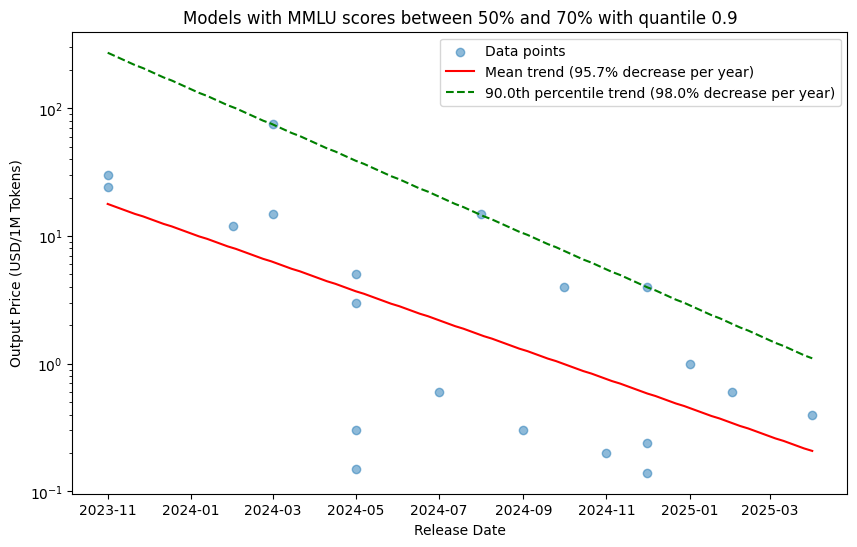

In [9]:
# graph trend in price for models with GPQA in certain range

df = pd.read_csv('art_analysis_scrape.csv')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
upper_level_gp = 70
lower_level_gp = 50
quantile = 0.9
benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'
type = 'Proprietary'
# type = 'Open'
df = df[df['License'] == type]

# Drop nan values
df = df[df[benchmark_feature].notna()]
df = df[df['Release Date'].notna()]

# Convert GPQA values to float - handle the case where values are already numeric
# First check if the values are strings or already numeric
if df[benchmark_feature].dtype == 'object':
    # If they're strings, remove the % sign and convert
    df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
else:
    # If they're already numeric, just ensure they're float type
    df[benchmark_feature] = df[benchmark_feature].astype(float)

# Filter based on GPQA - fix the logical operator (use 'and' or '&' with parentheses)
gpqa_df = df[(df[benchmark_feature] >= lower_level_gp) & 
             (df[benchmark_feature] <= upper_level_gp)]

# Convert dates to numeric format for regression
gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

# Take log of prices for linear regression, handling zeros and infinities
output_prices = gpqa_df['Output Price\nUSD/1M Tokens']
# Filter out zeros and negative values before taking log
valid_prices = output_prices[output_prices > 0]
gpqa_df_filtered = gpqa_df[output_prices > 0]
log_prices = np.log(valid_prices)

# Check for infinite values and remove them
mask = np.isfinite(log_prices)
gpqa_df_filtered = gpqa_df_filtered[mask]
log_prices = log_prices[mask]

# Fit linear regression model
X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
y = log_prices.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calculate percent decrease per year
# The coefficient represents the change in log price per day
daily_rate = model.coef_[0][0]
# Convert to yearly rate
yearly_rate = daily_rate * 365
# Convert log change to percent change: e^yearly_rate - 1
percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
# Since we expect a decrease, make it positive for reporting
percent_decrease_per_year = -percent_change_per_year

# Generate prediction line
date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
log_price_pred = model.predict(date_range)
price_pred = np.exp(log_price_pred)

# Fit quantile regression using sklearn
from sklearn.linear_model import QuantileRegressor

# Create and fit the quantile regression model
quant_model = QuantileRegressor(quantile=quantile, alpha=0)
quant_model.fit(X, y)  # Use the same X and y as linear regression

# Generate quantile regression prediction line
log_price_quant_pred = quant_model.predict(date_range)
price_quant_pred = np.exp(log_price_quant_pred)

# Calculate percent decrease per year for quantile regression
daily_rate_quant = quant_model.coef_[0]  # Get coefficient from sklearn model
yearly_rate_quant = daily_rate_quant * 365
percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100
percent_decrease_per_year_quant = -percent_change_per_year_quant

# Convert numeric dates back to datetime for plotting
date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

# Plot output price vs release date for gpqa_df with trend line
plt.figure(figsize=(10, 6))
plt.scatter(gpqa_df_filtered['Release Date'], gpqa_df_filtered['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Data points')
plt.plot(date_range_dt, price_pred, 'r-', label=f'Mean trend ({percent_decrease_per_year:.1f}% decrease per year)')
plt.plot(date_range_dt, price_quant_pred, 'g--', label=f'{quantile*100}th percentile trend ({percent_decrease_per_year_quant:.1f}% decrease per year)')
plt.xlabel('Release Date')
plt.ylabel('Output Price (USD/1M Tokens)')
plt.yscale('log')
plt.title(f'Models with MMLU scores between {lower_level_gp}% and {upper_level_gp}% with quantile {quantile}')
plt.legend()

# Plotting Function

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/30150564.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/30150564.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)


Filtering by license type:  Proprietary


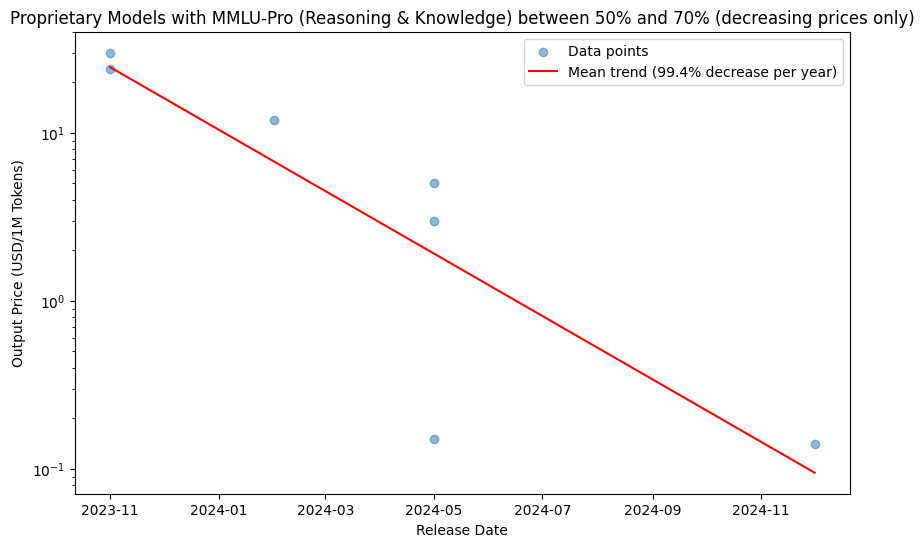

In [10]:


def plot_price_trends(upper_level_gp, lower_level_gp, quantile=None, type='Proprietary', benchmark_feature='MMLU-Pro (Reasoning & Knowledge)', only_decreasing=False):
    """
    Plots price trends for models with MMLU-Pro (Reasoning & Knowledge) scores
    between lower_level_gp and upper_level_gp. Filters by license type.
    Optional quantile regression can be included by specifying a quantile value.
    If only_decreasing is True, only include points that represent price decreases over time.
    """

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
    if type != "all":
        print("Filtering by license type: ", type)
        df = df[df['License'] == type]
    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]

    # Convert GPQA values to float - handle the case where values are already numeric
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Filter based on GPQA
    gpqa_df = df[(df[benchmark_feature] >= lower_level_gp) & 
                 (df[benchmark_feature] <= upper_level_gp)]

    # Convert dates to numeric format for regression
    gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

    # Take log of prices for linear regression, handling zeros and infinities
    output_prices = gpqa_df['Output Price\nUSD/1M Tokens']
    valid_prices = output_prices[output_prices > 0]
    gpqa_df_filtered = gpqa_df[output_prices > 0]
    log_prices = np.log(valid_prices)

    # Check for infinite values and remove them
    mask = np.isfinite(log_prices)
    gpqa_df_filtered = gpqa_df_filtered[mask]
    log_prices = log_prices[mask]
    
    # If only_decreasing is True, filter for points that represent price decreases
    if only_decreasing:
        # Sort by date
        gpqa_df_filtered = gpqa_df_filtered.sort_values('Release Date')
        # Initialize with first point
        min_price_so_far = gpqa_df_filtered['Output Price\nUSD/1M Tokens'].iloc[0]
        keep_indices = [0]  # Always keep the first point
        
        # For each subsequent point, check if it's lower than all previous points
        for i in range(1, len(gpqa_df_filtered)):
            current_price = gpqa_df_filtered['Output Price\nUSD/1M Tokens'].iloc[i]
            if current_price < min_price_so_far:
                keep_indices.append(i)
                min_price_so_far = current_price
        
        # Filter to keep only the decreasing price points
        gpqa_df_filtered = gpqa_df_filtered.iloc[keep_indices]
        log_prices = np.log(gpqa_df_filtered['Output Price\nUSD/1M Tokens'])

    # Fit linear regression model
    X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
    y = log_prices.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    # Calculate percent decrease per year
    daily_rate = model.coef_[0][0]
    yearly_rate = daily_rate * 365
    percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
    percent_decrease_per_year = -percent_change_per_year

    # Generate prediction line
    date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    log_price_pred = model.predict(date_range)
    price_pred = np.exp(log_price_pred)

    # Convert numeric dates back to datetime for plotting
    date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

    # Plot output price vs release date for gpqa_df with trend line
    plt.figure(figsize=(10, 6))
    plt.scatter(gpqa_df_filtered['Release Date'], gpqa_df_filtered['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Data points')
    plt.plot(date_range_dt, price_pred, 'r-', label=f'Mean trend ({percent_decrease_per_year:.1f}% decrease per year)')
    
    # Add quantile regression if quantile is specified
    if quantile is not None:
        # Fit quantile regression using sklearn
        quant_model = QuantileRegressor(quantile=quantile, alpha=0)
        quant_model.fit(X, y)
        log_price_quant_pred = quant_model.predict(date_range)
        price_quant_pred = np.exp(log_price_quant_pred)

        # Calculate percent decrease per year for quantile regression
        daily_rate_quant = quant_model.coef_[0]
        yearly_rate_quant = daily_rate_quant * 365
        percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100
        percent_decrease_per_year_quant = -percent_change_per_year_quant
        
        plt.plot(date_range_dt, price_quant_pred, 'g--', label=f'{quantile*100:.0f}th percentile trend ({percent_decrease_per_year_quant:.1f}% decrease per year)')
        title_suffix = f" with quantile {quantile}"
    else:
        title_suffix = ""
    
    decreasing_suffix = " (decreasing prices only)" if only_decreasing else ""
    plt.title(f'{type} Models with {benchmark_feature} between {lower_level_gp}% and {upper_level_gp}%{title_suffix}{decreasing_suffix}')
    
    plt.xlabel('Release Date')
    plt.ylabel('Output Price (USD/1M Tokens)')
    plt.yscale('log')
    plt.legend()
    plt.show()

# Example usage:
# plot_price_trends(70, 50, quantile=None, type='Proprietary')
# plot_price_trends(70, 50, quantile=0.1, type='Open')
# plot_price_trends(70, 50, quantile=0.01, type='Open', only_decreasing=True)
plot_price_trends(70, 50, quantile=None, type='Proprietary', only_decreasing=True)

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/2505179647.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/2505179647.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpqa_df['Price_Per_Param'] = gpqa_df['Output Price\nUSD/1M Tokens'] / gpqa_df['Parameters_B']
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/2505179647.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Filtering by license type:  Open


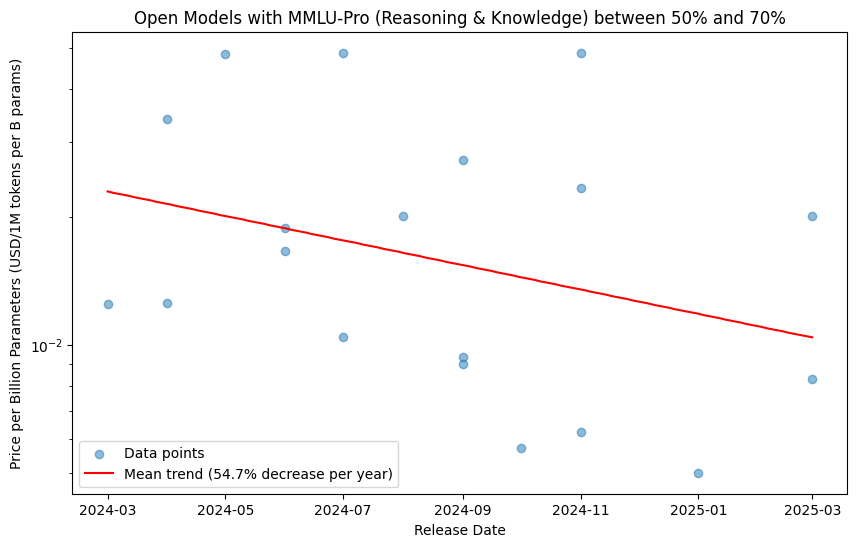

In [21]:
def plot_price_per_parameter_trends(upper_level_gp, lower_level_gp, quantile=None, type='Proprietary', benchmark_feature='MMLU-Pro (Reasoning & Knowledge)', only_decreasing=False):
    """
    Plots price per parameter trends for models with MMLU-Pro (Reasoning & Knowledge) scores
    between lower_level_gp and upper_level_gp. Filters by license type.
    Optional quantile regression can be included by specifying a quantile value.
    If only_decreasing is True, only include points that represent price per parameter decreases over time.
    """
    from sklearn.linear_model import LinearRegression, QuantileRegressor
    from datetime import datetime

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
    
    # Clean parameter count data
    def clean_param_count(value):
        if pd.isna(value):
            return np.nan
        if isinstance(value, (int, float)):
            return value
        try:
            # Extract number and convert to billions
            if "B" in str(value):
                return float(str(value).replace("B", ""))
            else:
                return float(value) / 1e9  # Convert to billions if raw number
        except:
            return np.nan
    
    df["Parameters_B"] = df["Parameter Count"].apply(clean_param_count)
    
    if type != "all":
        print("Filtering by license type: ", type)
        df = df[df['License'] == type]
    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    df = df[df["Parameters_B"].notna()]

    # Convert MMLU values to float - handle the case where values are already numeric
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Filter based on MMLU
    gpqa_df = df[(df[benchmark_feature] >= lower_level_gp) & 
                 (df[benchmark_feature] <= upper_level_gp)]

    # Calculate price per parameter
    gpqa_df['Price_Per_Param'] = gpqa_df['Output Price\nUSD/1M Tokens'] / gpqa_df['Parameters_B']

    # Convert dates to numeric format for regression
    gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

    # Take log of price per parameter for linear regression, handling zeros and infinities
    output_prices = gpqa_df['Price_Per_Param']
    valid_prices = output_prices[output_prices > 0]
    gpqa_df_filtered = gpqa_df[output_prices > 0]
    log_prices = np.log(valid_prices)

    # Check for infinite values and remove them
    mask = np.isfinite(log_prices)
    gpqa_df_filtered = gpqa_df_filtered[mask]
    log_prices = log_prices[mask]
    
    # If only_decreasing is True, filter for points that represent price decreases
    if only_decreasing:
        # Sort by date
        gpqa_df_filtered = gpqa_df_filtered.sort_values('Release Date')
        # Initialize with first point
        min_price_so_far = gpqa_df_filtered['Price_Per_Param'].iloc[0]
        keep_indices = [0]  # Always keep the first point
        
        # For each subsequent point, check if it's lower than all previous points
        for i in range(1, len(gpqa_df_filtered)):
            current_price = gpqa_df_filtered['Price_Per_Param'].iloc[i]
            if current_price < min_price_so_far:
                keep_indices.append(i)
                min_price_so_far = current_price
        
        # Filter to keep only the decreasing price points
        gpqa_df_filtered = gpqa_df_filtered.iloc[keep_indices]
        log_prices = np.log(gpqa_df_filtered['Price_Per_Param'])

    # Fit linear regression model
    X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
    y = log_prices.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    # Calculate percent decrease per year
    daily_rate = model.coef_[0][0]
    yearly_rate = daily_rate * 365
    percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
    percent_decrease_per_year = -percent_change_per_year

    # Generate prediction line
    date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    log_price_pred = model.predict(date_range)
    price_pred = np.exp(log_price_pred)

    # Convert numeric dates back to datetime for plotting
    date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

    # Plot price per parameter vs release date for gpqa_df with trend line
    plt.figure(figsize=(10, 6))
    plt.scatter(gpqa_df_filtered['Release Date'], gpqa_df_filtered['Price_Per_Param'], alpha=0.5, label='Data points')
    plt.plot(date_range_dt, price_pred, 'r-', label=f'Mean trend ({percent_decrease_per_year:.1f}% decrease per year)')
    
    # Add quantile regression if quantile is specified
    if quantile is not None:
        # Fit quantile regression using sklearn
        quant_model = QuantileRegressor(quantile=quantile, alpha=0)
        quant_model.fit(X, y)
        log_price_quant_pred = quant_model.predict(date_range)
        price_quant_pred = np.exp(log_price_quant_pred)

        # Calculate percent decrease per year for quantile regression
        daily_rate_quant = quant_model.coef_[0]
        yearly_rate_quant = daily_rate_quant * 365
        percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100
        percent_decrease_per_year_quant = -percent_change_per_year_quant
        
        plt.plot(date_range_dt, price_quant_pred, 'g--', label=f'{quantile*100:.0f}th percentile trend ({percent_decrease_per_year_quant:.1f}% decrease per year)')
        title_suffix = f" with quantile {quantile}"
    else:
        title_suffix = ""
    
    decreasing_suffix = " (decreasing prices only)" if only_decreasing else ""
    plt.title(f'{type} Models with {benchmark_feature} between {lower_level_gp}% and {upper_level_gp}%{title_suffix}{decreasing_suffix}')
    
    plt.xlabel('Release Date')
    plt.ylabel('Price per Billion Parameters (USD/1M tokens per B params)')
    plt.yscale('log')
    plt.legend()
    plt.show()

# Example usage:
plot_price_per_parameter_trends(70, 50, quantile=None, type='Open', only_decreasing=False)

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/570335741.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_21213/570335741.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)


Filtering by license type:  Open


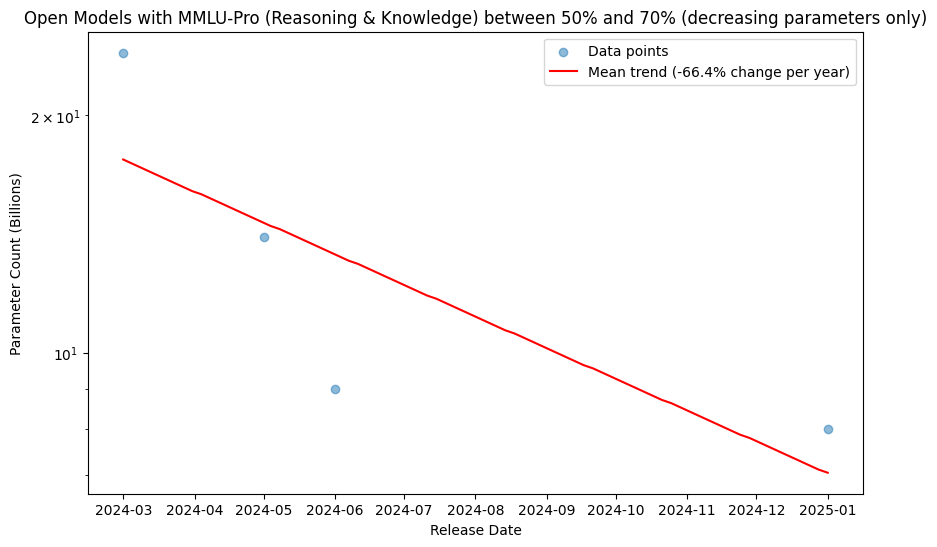

In [23]:
def plot_parameter_count_trends(upper_level_gp, lower_level_gp, quantile=None, type='Proprietary', benchmark_feature='MMLU-Pro (Reasoning & Knowledge)', only_decreasing=False):
    """
    Plots parameter count trends for models with MMLU-Pro (Reasoning & Knowledge) scores
    between lower_level_gp and upper_level_gp. Filters by license type.
    Optional quantile regression can be included by specifying a quantile value.
    If only_decreasing is True, only include points that represent parameter count decreases over time.
    """
    from sklearn.linear_model import LinearRegression, QuantileRegressor
    from datetime import datetime

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    
    # Clean parameter count data
    def clean_param_count(value):
        if pd.isna(value):
            return np.nan
        if isinstance(value, (int, float)):
            return value
        try:
            # Extract number and convert to billions
            if "B" in str(value):
                return float(str(value).replace("B", ""))
            else:
                return float(value) / 1e9  # Convert to billions if raw number
        except:
            return np.nan
    
    df["Parameters_B"] = df["Parameter Count"].apply(clean_param_count)
    
    if type != "all":
        print("Filtering by license type: ", type)
        df = df[df['License'] == type]
    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    df = df[df["Parameters_B"].notna()]

    # Convert MMLU values to float - handle the case where values are already numeric
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Filter based on MMLU
    gpqa_df = df[(df[benchmark_feature] >= lower_level_gp) & 
                 (df[benchmark_feature] <= upper_level_gp)]

    # Convert dates to numeric format for regression
    gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

    # Take log of parameter count for linear regression, handling zeros and infinities
    parameter_counts = gpqa_df['Parameters_B']
    valid_params = parameter_counts[parameter_counts > 0]
    gpqa_df_filtered = gpqa_df[parameter_counts > 0]
    log_params = np.log(valid_params)

    # Check for infinite values and remove them
    mask = np.isfinite(log_params)
    gpqa_df_filtered = gpqa_df_filtered[mask]
    log_params = log_params[mask]
    
    # If only_decreasing is True, filter for points that represent parameter decreases
    if only_decreasing:
        # Sort by date
        gpqa_df_filtered = gpqa_df_filtered.sort_values('Release Date')
        # Initialize with first point
        min_param_so_far = gpqa_df_filtered['Parameters_B'].iloc[0]
        keep_indices = [0]  # Always keep the first point
        
        # For each subsequent point, check if it's lower than all previous points
        for i in range(1, len(gpqa_df_filtered)):
            current_param = gpqa_df_filtered['Parameters_B'].iloc[i]
            if current_param < min_param_so_far:
                keep_indices.append(i)
                min_param_so_far = current_param
        
        # Filter to keep only the decreasing parameter points
        gpqa_df_filtered = gpqa_df_filtered.iloc[keep_indices]
        log_params = np.log(gpqa_df_filtered['Parameters_B'])

    # Fit linear regression model
    X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
    y = log_params.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    # Calculate percent change per year
    daily_rate = model.coef_[0][0]
    yearly_rate = daily_rate * 365
    percent_change_per_year = (np.exp(yearly_rate) - 1) * 100

    # Generate prediction line
    date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    log_param_pred = model.predict(date_range)
    param_pred = np.exp(log_param_pred)

    # Convert numeric dates back to datetime for plotting
    date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

    # Plot parameter count vs release date for gpqa_df with trend line
    plt.figure(figsize=(10, 6))
    plt.scatter(gpqa_df_filtered['Release Date'], gpqa_df_filtered['Parameters_B'], alpha=0.5, label='Data points')
    plt.plot(date_range_dt, param_pred, 'r-', label=f'Mean trend ({percent_change_per_year:.1f}% change per year)')
    
    # Add quantile regression if quantile is specified
    if quantile is not None:
        # Fit quantile regression using sklearn
        quant_model = QuantileRegressor(quantile=quantile, alpha=0)
        quant_model.fit(X, y)
        log_param_quant_pred = quant_model.predict(date_range)
        param_quant_pred = np.exp(log_param_quant_pred)

        # Calculate percent change per year for quantile regression
        daily_rate_quant = quant_model.coef_[0]
        yearly_rate_quant = daily_rate_quant * 365
        percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100
        
        plt.plot(date_range_dt, param_quant_pred, 'g--', label=f'{quantile*100:.0f}th percentile trend ({percent_change_per_year_quant:.1f}% change per year)')
        title_suffix = f" with quantile {quantile}"
    else:
        title_suffix = ""
    
    decreasing_suffix = " (decreasing parameters only)" if only_decreasing else ""
    plt.title(f'{type} Models with {benchmark_feature} between {lower_level_gp}% and {upper_level_gp}%{title_suffix}{decreasing_suffix}')
    
    plt.xlabel('Release Date')
    plt.ylabel('Parameter Count (Billions)')
    plt.yscale('log')
    plt.legend()
    plt.show()

# Example usage:
plot_parameter_count_trends(70, 50, quantile=None, type='Open', only_decreasing=True)

# Price Per Parameter Trend

In [31]:
# Add after line 124, before the time trend analysis

def plot_price_per_parameter_trends(upper_level_gp, lower_level_gp, quantile=None, type='Proprietary', only_decreasing=False):
    """
    Plots price per parameter trends for models with MMLU-Pro scores between 
    lower_level_gp and upper_level_gp. Filters by license type.
    Optional quantile regression can be included by specifying a quantile value.
    If only_decreasing is True, only include points that represent price decreases over time.
    """
    from sklearn.linear_model import LinearRegression, QuantileRegressor
    from datetime import datetime

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
    if type != "all":
        print("Filtering by license type: ", type)
        df = df[df['License'] == type]
    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    mmlu_df = df
    mmlu_df["Parameters_B_Final"] = mmlu_df["Parameter Count"].astype(float)

    # Convert GPQA values to float - handle the case where values are already numeric
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)
    
    # Use the already loaded and cleaned dataframe
    # Filter based on MMLU-Pro
    if type != "all":
        mmlu_df = df[df['License'] == type]
    else:
        mmlu_df = df.copy()
    
    # Clean MMLU-Pro values
    def clean_mmlu_pro(value):
        if pd.isna(value):
            return np.nan
        try:
            # Convert percentage string to float
            if isinstance(value, str) and "%" in value:
                return float(value.replace("%", ""))
            return float(value) * 100  # If already decimal, convert to percentage
        except:
            return np.nan
    
    mmlu_df["MMLU_Pro"] = mmlu_df["MMLU-Pro (Reasoning & Knowledge)"].apply(clean_mmlu_pro)
    
    # Filter based on MMLU range
    mmlu_df = mmlu_df[(mmlu_df["MMLU_Pro"] >= lower_level_gp) & 
                      (mmlu_df["MMLU_Pro"] <= upper_level_gp)]
    
    # Filter for models with release date and necessary parameters
    mmlu_df = mmlu_df.dropna(subset=["Release_Date", "Parameters_B_Final", "Output_Price"])
    
    # Calculate price per parameter
    mmlu_df["Price_Per_Param"] = mmlu_df["Output_Price"] / mmlu_df["Parameters_B_Final"]
    
    # Convert dates to numeric format for regression
    mmlu_df['Date_Numeric'] = pd.to_datetime(mmlu_df['Release_Date']).map(datetime.toordinal)
    
    # Take log of price per parameter for linear regression
    valid_prices = mmlu_df['Price_Per_Param'][mmlu_df['Price_Per_Param'] > 0]
    mmlu_df_filtered = mmlu_df[mmlu_df['Price_Per_Param'] > 0]
    log_prices = np.log(valid_prices)
    
    # Check for infinite values and remove them
    mask = np.isfinite(log_prices)
    mmlu_df_filtered = mmlu_df_filtered[mask]
    log_prices = log_prices[mask]
    
    # If only_decreasing is True, filter for points that represent price decreases
    if only_decreasing:
        # Sort by date
        mmlu_df_filtered = mmlu_df_filtered.sort_values('Release_Date')
        # Initialize with first point
        min_price_so_far = mmlu_df_filtered['Price_Per_Param'].iloc[0]
        keep_indices = [0]  # Always keep the first point
        
        # For each subsequent point, check if it's lower than all previous points
        for i in range(1, len(mmlu_df_filtered)):
            current_price = mmlu_df_filtered['Price_Per_Param'].iloc[i]
            if current_price < min_price_so_far:
                keep_indices.append(i)
                min_price_so_far = current_price
        
        # Filter to keep only the decreasing price points
        mmlu_df_filtered = mmlu_df_filtered.iloc[keep_indices]
        log_prices = np.log(mmlu_df_filtered['Price_Per_Param'])
    
    # Fit linear regression model
    X = mmlu_df_filtered['Date_Numeric'].values.reshape(-1, 1)
    y = log_prices.values.reshape(-1, 1)
    
    # Create figure for plotting
    plt.figure(figsize=(12, 8))
    
    # Only proceed with regression if we have enough data points
    if len(mmlu_df_filtered) >= 2:
        model = LinearRegression()
        model.fit(X, y)
        
        # Calculate percent decrease per year
        daily_rate = model.coef_[0][0]
        yearly_rate = daily_rate * 365
        percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
        percent_decrease_per_year = -percent_change_per_year
        
        # Generate prediction line
        date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        log_price_pred = model.predict(date_range)
        price_pred = np.exp(log_price_pred)
        
        # Convert numeric dates back to datetime for plotting
        date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]
        
        # Plot trend line
        plt.plot(date_range_dt, price_pred, 'r-', 
                label=f'Mean trend ({percent_decrease_per_year:.1f}% decrease per year)')
        
        # Add quantile regression if quantile is specified
        if quantile is not None:
            # Fit quantile regression
            quant_model = QuantileRegressor(quantile=quantile, alpha=0)
            quant_model.fit(X, y)
            log_price_quant_pred = quant_model.predict(date_range)
            price_quant_pred = np.exp(log_price_quant_pred)
            
            # Calculate percent decrease per year for quantile regression
            daily_rate_quant = quant_model.coef_[0]
            yearly_rate_quant = daily_rate_quant * 365
            percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100
            percent_decrease_per_year_quant = -percent_change_per_year_quant
            
            plt.plot(date_range_dt, price_quant_pred, 'g--', 
                    label=f'{quantile*100:.0f}th percentile trend ({percent_decrease_per_year_quant:.1f}% decrease per year)')
            title_suffix = f" with quantile {quantile}"
        else:
            title_suffix = ""
    else:
        title_suffix = " (insufficient data for trend)"
    
    # Plot data points
    plt.scatter(mmlu_df_filtered['Release_Date'], mmlu_df_filtered['Price_Per_Param'], 
                alpha=0.7, label='Data points')
    
    # Add labels for data points
    for _, row in mmlu_df_filtered.iterrows():
        plt.annotate(row['Model'], 
                    (row['Release_Date'], row['Price_Per_Param']),
                    fontsize=8, alpha=0.7)
    
    decreasing_suffix = " (decreasing prices only)" if only_decreasing else ""
    plt.title(f'{type} Models with MMLU-Pro between {lower_level_gp}% and {upper_level_gp}%{title_suffix}{decreasing_suffix}', 
             fontsize=15)
    
    plt.xlabel('Release Date', fontsize=12)
    plt.ylabel('Price per Billion Parameters (USD/1M tokens)', fontsize=12)
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    # Save the figure
    suffix = f"_{lower_level_gp}to{upper_level_gp}"
    if only_decreasing:
        suffix += "_decreasing"
    if quantile is not None:
        suffix += f"_q{int(quantile*100)}"
    
    plt.savefig(f"price_per_parameter_trend_mmlu{suffix}.png", dpi=300)
    
    return mmlu_df_filtered

# Example usage of the function
mmlu_filtered_df = plot_price_per_parameter_trends(70, 50, quantile=0.1, type='Open', only_decreasing=False)

Filtering by license type:  Open


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_60141/2656783320.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


KeyError: ['Release_Date', 'Output_Price']

# Plot number of parameters over time

In [30]:
def plot_parameter_count_trends(upper_level_gp, lower_level_gp, quantile=None, type='Proprietary', only_increasing=False):
    """
    Plots parameter count trends over time for models with MMLU-Pro scores between 
    lower_level_gp and upper_level_gp. Filters by license type.
    Optional quantile regression can be included by specifying a quantile value.
    If only_increasing is True, only include points that represent parameter count increases over time.
    """
    from sklearn.linear_model import LinearRegression, QuantileRegressor
    from datetime import datetime
    
    
    # Use the already loaded and cleaned dataframe
    # Filter based on MMLU-Pro
    if type != "all":
        mmlu_df = df[df['License'] == type]
    else:
        mmlu_df = df.copy()
    
    # Clean MMLU-Pro values
    def clean_mmlu_pro(value):
        if pd.isna(value):
            return np.nan
        try:
            # Convert percentage string to float
            if isinstance(value, str) and "%" in value:
                return float(value.replace("%", ""))
            return float(value) * 100  # If already decimal, convert to percentage
        except:
            return np.nan
    
    mmlu_df["MMLU_Pro"] = mmlu_df["MMLU-Pro (Reasoning & Knowledge)"].apply(clean_mmlu_pro)

    mmlu_df["Parameters_B_Final"] = mmlu_df["Parameter Count"].astype(float)
    
    # Filter based on MMLU range
    mmlu_df = mmlu_df[(mmlu_df["MMLU_Pro"] >= lower_level_gp) & 
                      (mmlu_df["MMLU_Pro"] <= upper_level_gp)]
    
    # Filter for models with release date and parameter counts
    mmlu_df = mmlu_df.dropna(subset=["Release_Date", "Parameters_B_Final"])
    
    # Convert dates to numeric format for regression
    mmlu_df['Date_Numeric'] = pd.to_datetime(mmlu_df['Release_Date']).map(datetime.toordinal)
    
    # Take log of parameter count for linear regression (to handle exponential growth)
    valid_params = mmlu_df['Parameters_B_Final'][mmlu_df['Parameters_B_Final'] > 0]
    mmlu_df_filtered = mmlu_df[mmlu_df['Parameters_B_Final'] > 0]
    log_params = np.log(valid_params)
    
    # Check for infinite values and remove them
    mask = np.isfinite(log_params)
    mmlu_df_filtered = mmlu_df_filtered[mask]
    log_params = log_params[mask]
    
    # If only_increasing is True, filter for points that represent parameter increases
    if only_increasing:
        # Sort by date
        mmlu_df_filtered = mmlu_df_filtered.sort_values('Release_Date')
        # Initialize with first point
        max_param_so_far = mmlu_df_filtered['Parameters_B_Final'].iloc[0]
        keep_indices = [0]  # Always keep the first point
        
        # For each subsequent point, check if it's higher than all previous points
        for i in range(1, len(mmlu_df_filtered)):
            current_param = mmlu_df_filtered['Parameters_B_Final'].iloc[i]
            if current_param > max_param_so_far:
                keep_indices.append(i)
                max_param_so_far = current_param
        
        # Filter to keep only the increasing parameter points
        mmlu_df_filtered = mmlu_df_filtered.iloc[keep_indices]
        log_params = np.log(mmlu_df_filtered['Parameters_B_Final'])
    
    # Fit linear regression model
    X = mmlu_df_filtered['Date_Numeric'].values.reshape(-1, 1)
    y = log_params.values.reshape(-1, 1)
    
    # Create figure for plotting
    plt.figure(figsize=(12, 8))
    
    # Only proceed with regression if we have enough data points
    if len(mmlu_df_filtered) >= 2:
        model = LinearRegression()
        model.fit(X, y)
        
        # Calculate percent increase per year
        daily_rate = model.coef_[0][0]
        yearly_rate = daily_rate * 365
        percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
        
        # Generate prediction line
        date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        log_param_pred = model.predict(date_range)
        param_pred = np.exp(log_param_pred)
        
        # Convert numeric dates back to datetime for plotting
        date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]
        
        # Plot trend line
        plt.plot(date_range_dt, param_pred, 'r-', 
                label=f'Mean trend ({percent_change_per_year:.1f}% increase per year)')
        
        # Add quantile regression if quantile is specified
        if quantile is not None:
            # Fit quantile regression
            quant_model = QuantileRegressor(quantile=quantile, alpha=0)
            quant_model.fit(X, y)
            log_param_quant_pred = quant_model.predict(date_range)
            param_quant_pred = np.exp(log_param_quant_pred)
            
            # Calculate percent increase per year for quantile regression
            daily_rate_quant = quant_model.coef_[0]
            yearly_rate_quant = daily_rate_quant * 365
            percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100
            
            plt.plot(date_range_dt, param_quant_pred, 'g--', 
                    label=f'{quantile*100:.0f}th percentile trend ({percent_change_per_year_quant:.1f}% increase per year)')
            title_suffix = f" with quantile {quantile}"
        else:
            title_suffix = ""
    else:
        title_suffix = " (insufficient data for trend)"
    
    # Plot data points
    plt.scatter(mmlu_df_filtered['Release_Date'], mmlu_df_filtered['Parameters_B_Final'], 
                alpha=0.7, label='Data points')
    
    # Add labels for data points
    for _, row in mmlu_df_filtered.iterrows():
        plt.annotate(row['Model'], 
                    (row['Release_Date'], row['Parameters_B_Final']),
                    fontsize=8, alpha=0.7)
    
    increasing_suffix = " (increasing parameters only)" if only_increasing else ""
    plt.title(f'{type} Models with MMLU-Pro between {lower_level_gp}% and {upper_level_gp}%{title_suffix}{increasing_suffix}', 
             fontsize=15)
    
    plt.xlabel('Release Date', fontsize=12)
    plt.ylabel('Parameter Count (Billions)', fontsize=12)
    plt.yscale('log')  # Log scale for parameter count
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    # Save the figure
    suffix = f"_{lower_level_gp}to{upper_level_gp}"
    if only_increasing:
        suffix += "_increasing"
    if quantile is not None:
        suffix += f"_q{int(quantile*100)}"
    
    plt.savefig(f"parameter_count_trend_mmlu{suffix}.png", dpi=300)
    
    return mmlu_df_filtered

# Example usage of the function
mmlu_filtered_df = plot_parameter_count_trends(70, 50, quantile=0.2, type='all')

KeyError: ['Release_Date', 'Parameters_B_Final']

Number of models with complete data: 80

Price per billion parameters summary statistics:
count    80.000000
mean      0.017865
std       0.026823
min       0.000000
25%       0.001639
50%       0.012176
75%       0.020025
max       0.187500
Name: Price_Per_Param, dtype: float64

Analysis complete. Charts saved to:
- price_per_parameter_trend.png
- price_per_parameter_time_trend_mmlu_filtered.png
- parameter_count_vs_price.png


/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


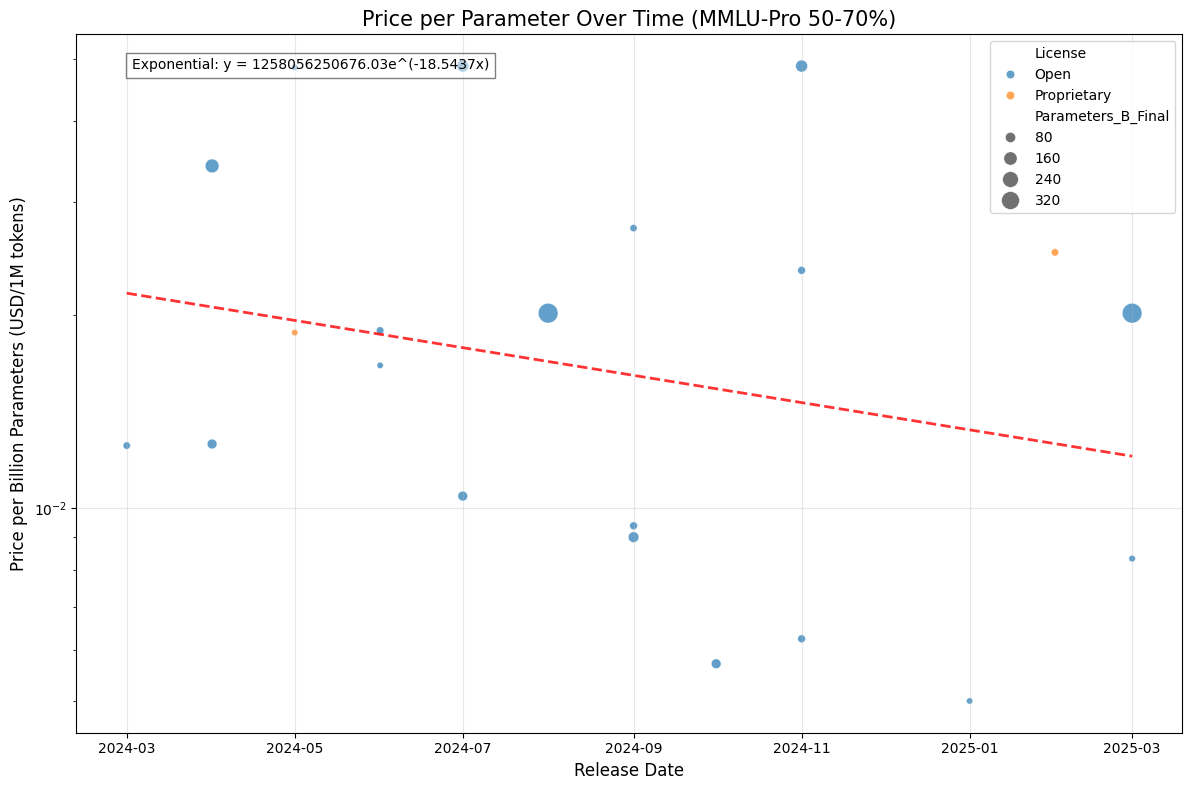

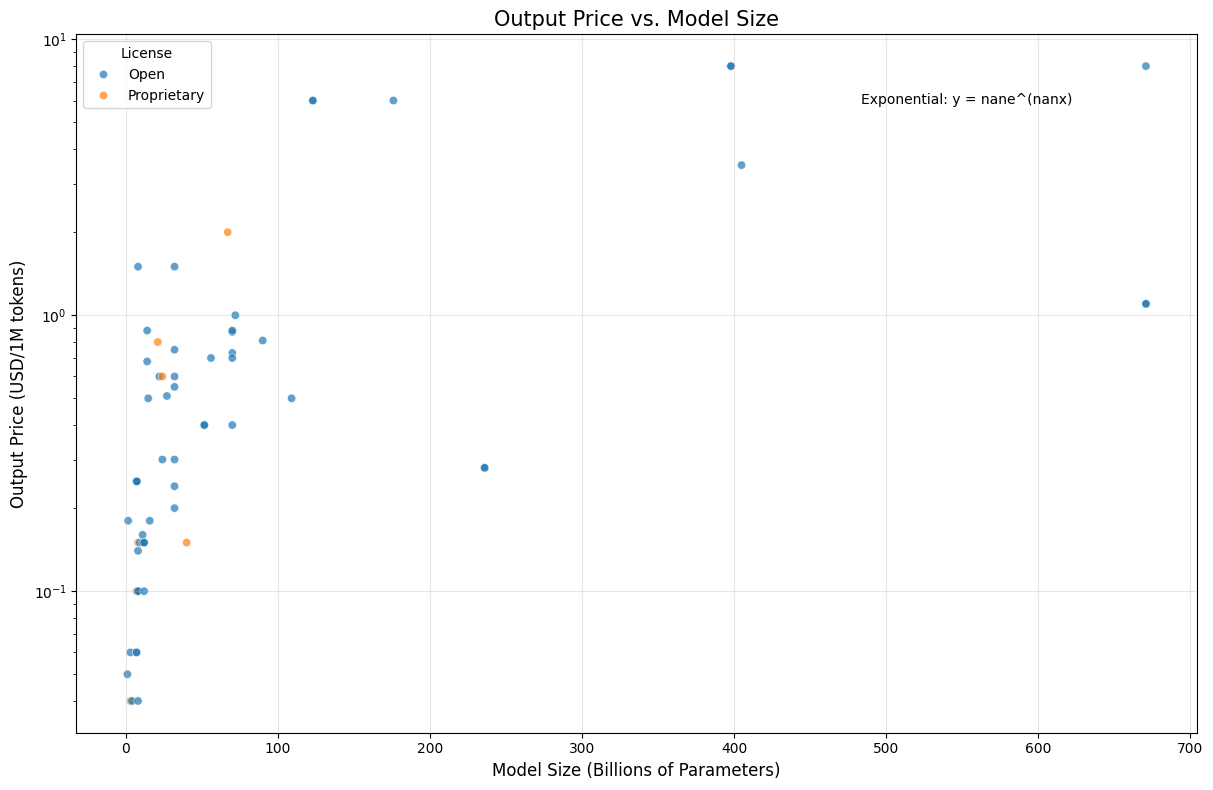

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the CSV file
df = pd.read_csv("art_analysis_scrape.csv")


# Clean the data
# Extract numeric parameter counts
def clean_param_count(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int, float)):
        return value
    try:
        # Extract number and convert to billions
        if "B" in str(value):
            return float(str(value).replace("B", ""))
        else:
            return float(value) / 1e9  # Convert to billions if raw number
    except:
        return np.nan


# Clean parameter count columns
df["Parameters_B"] = df["Parameter Count"].apply(clean_param_count)
if "Parameter Count #Solid" in df.columns:
    df["Parameters_B_Solid"] = df["Parameter Count #Solid"].apply(clean_param_count)
    # Use solid parameter count if available, otherwise use regular parameter count
    df["Parameters_B_Final"] = df["Parameters_B_Solid"].fillna(df["Parameters_B"])
else:
    df["Parameters_B_Final"] = df["Parameters_B"]


# Clean price data
def clean_price(value):
    if pd.isna(value):
        return np.nan
    try:
        if isinstance(value, str) and "$" in value:
            return float(value.replace("$", "").strip())
        return float(value)
    except:
        return np.nan


df["Output_Price"] = df["Output Price\nUSD/1M Tokens"].apply(clean_price)

# Calculate price per parameter (dollars per billion parameters)
df["Price_Per_Param"] = df["Output_Price"] / df["Parameters_B_Final"]

# Filter out rows with missing data
filtered_df = df.dropna(
    subset=["Parameters_B_Final", "Output_Price", "Price_Per_Param"]
)

# Sort by parameter count for trend analysis
filtered_df = filtered_df.sort_values("Parameters_B_Final")

# Print summary statistics
print(f"Number of models with complete data: {len(filtered_df)}")
print("\nPrice per billion parameters summary statistics:")
print(filtered_df["Price_Per_Param"].describe())
# Filter for models with MMLU-Pro between 50% and 70%
def clean_mmlu_pro(value):
    if pd.isna(value):
        return np.nan
    try:
        # Convert percentage string to float
        if isinstance(value, str) and "%" in value:
            return float(value.replace("%", ""))
        return float(value) * 100  # If already decimal, convert to percentage
    except:
        return np.nan


# Add MMLU-Pro column with cleaned values
df["MMLU_Pro"] = df["MMLU-Pro (Reasoning & Knowledge)"].apply(clean_mmlu_pro)

# Time trend analysis with MMLU-Pro filter
if "Release Date" in df.columns:
    # Convert release date to datetime
    df["Release_Date"] = pd.to_datetime(
        df["Release Date"], format="%m/%d/%y", errors="coerce"
    )

    # Filter for models with release date, parameters, price, and MMLU-Pro in range 50-70%
    time_df = df.dropna(subset=["Release_Date", "Parameters_B_Final", "Output_Price"])
    time_df = time_df[(time_df["MMLU_Pro"] >= 50) & (time_df["MMLU_Pro"] <= 70)]

    # Sort by release date
    time_df = time_df.sort_values("Release_Date")

    # Calculate price per parameter over time
    time_df["Price_Per_Param"] = time_df["Output_Price"] / time_df["Parameters_B_Final"]
    # Plot price per parameter over time
    plt.figure(figsize=(12, 8))

    # Plot data points
    sns.scatterplot(
        data=time_df,
        x="Release_Date",
        y="Price_Per_Param",
        hue="License",
        size="Parameters_B_Final",
        sizes=(20, 200),
        alpha=0.7,
    )

    # Add exponential trend line
    try:
        # Convert dates to numeric for trend line
        x_numeric = (
            time_df["Release_Date"].astype(int) / 10**18
        )  # Normalize to avoid overflow
        
        # Handle zeros or negative values before taking log
        valid_mask = time_df["Price_Per_Param"] > 0
        x_valid = x_numeric[valid_mask]
        y_valid = time_df["Price_Per_Param"][valid_mask]
        
        # Take log of y for exponential fit: ln(y) = ln(a) + b*x
        log_y = np.log(y_valid)
        
        # Skip if no valid data points
        if len(log_y) > 1:
            z = np.polyfit(x_valid, log_y, 1)
            a = np.exp(z[1])
            b = z[0]
            
            # Create date range for plotting
            date_range = pd.date_range(start=min(time_df["Release_Date"]), end=max(time_df["Release_Date"]), periods=100)
            date_numeric = (date_range.astype(int) / 10**18)
            
            # Generate exponential trend values
            y_pred = a * np.exp(b * date_numeric)
            
            # Plot exponential trend line
            plt.plot(date_range, y_pred, "r--", alpha=0.8, linewidth=2)
        else:
            print("Not enough valid data points for exponential fit")
        
        # Add equation to plot
        plt.text(
            0.05,
            0.95,
            f"Exponential: y = {a:.2f}e^({b:.4f}x)",
            transform=plt.gca().transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.5)
        )
    except Exception as e:
        print(f"Could not add exponential trend line to time plot: {e}")

    plt.title("Price per Parameter Over Time (MMLU-Pro 50-70%)", fontsize=15)
    plt.xlabel("Release Date", fontsize=12)
    plt.ylabel("Price per Billion Parameters (USD/1M tokens)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.yscale("log")

    # Save the figure with a new name to distinguish from original


# %%
# Additional analysis: Parameter count vs. price
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df, x="Parameters_B_Final", y="Output_Price", hue="License", alpha=0.7
)

# Fit exponential trend (y = a*e^(b*x))
x = filtered_df["Parameters_B_Final"]
y = filtered_df["Output_Price"]
# Take log of y for linear fit: ln(y) = ln(a) + b*x
log_y = np.log(y)
z = np.polyfit(x, log_y, 1)
a = np.exp(z[1])
b = z[0]
x_range = np.linspace(
    min(filtered_df["Parameters_B_Final"]), max(filtered_df["Parameters_B_Final"]), 100
)
y_pred = a * np.exp(b * x_range)
plt.plot(x_range, y_pred, "r--", alpha=0.8, linewidth=2)
plt.text(
    0.7,
    0.9,
    f"Exponential: y = {a:.2f}e^({b:.4f}x)",
    transform=plt.gca().transAxes,
    fontsize=10,
)

plt.title("Output Price vs. Model Size", fontsize=15)
plt.xlabel("Model Size (Billions of Parameters)", fontsize=12)
plt.ylabel("Output Price (USD/1M tokens)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.yscale("log")

# Save the figure

print("\nAnalysis complete. Charts saved to:")
print("- price_per_parameter_trend.png")
print("- price_per_parameter_time_trend_mmlu_filtered.png")
print("- parameter_count_vs_price.png")

# Analysis Of All Trends

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/46929028.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/46929028.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)
/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

Filtering by license type:  Open


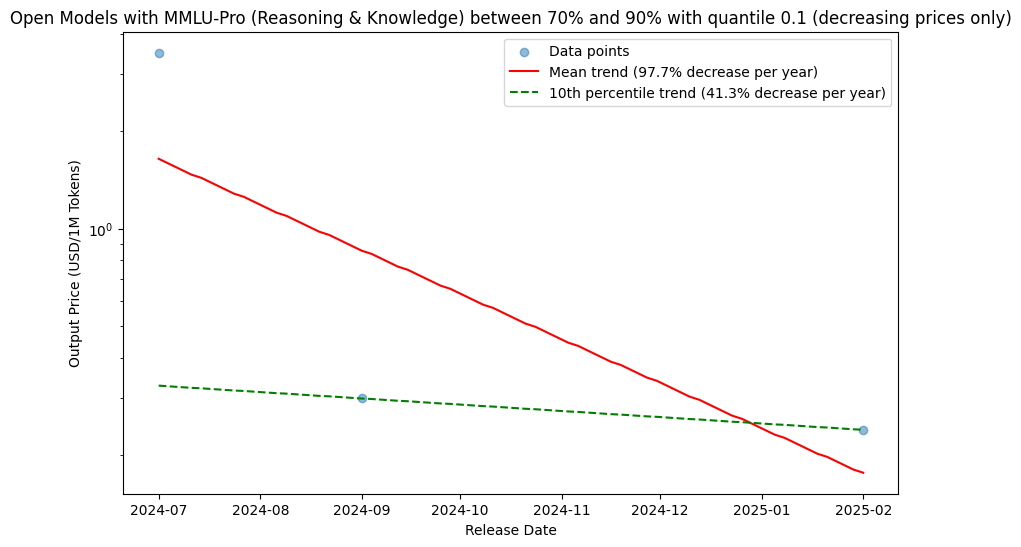

In [128]:
# plot_price_trends(50, 30, quantile=0.1, type='Proprietary', benchmark_feature="LiveCodeBench (Coding)")
# plot_price_trends(50, 30, quantile=0.1, type='Open', benchmark_feature="LiveCodeBench (Coding)")
plot_price_trends(90, 70, quantile=0.1, type='Open',benchmark_feature="MMLU-Pro (Reasoning & Knowledge)",  only_decreasing=True)
# plot_price_trends(70, 50, quantile=0.1, type='Open')
# plot_price_trends(90, 70, quantile=0.01, type='Proprietary')
# plot_price_trends(90, 70, quantile=0.01, type='Open')

# Looking at Parameter Count Experiments
- holding quality constant look at param over time
- look at price/param ratio over time, using just open source 
- holding param constant look at quality over time 


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/2871814252.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/2871814252.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmlu_df['Date_Numeric'] = pd.to_datetime(mmlu_df['Release Date']).map(datetime.toordinal)
/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

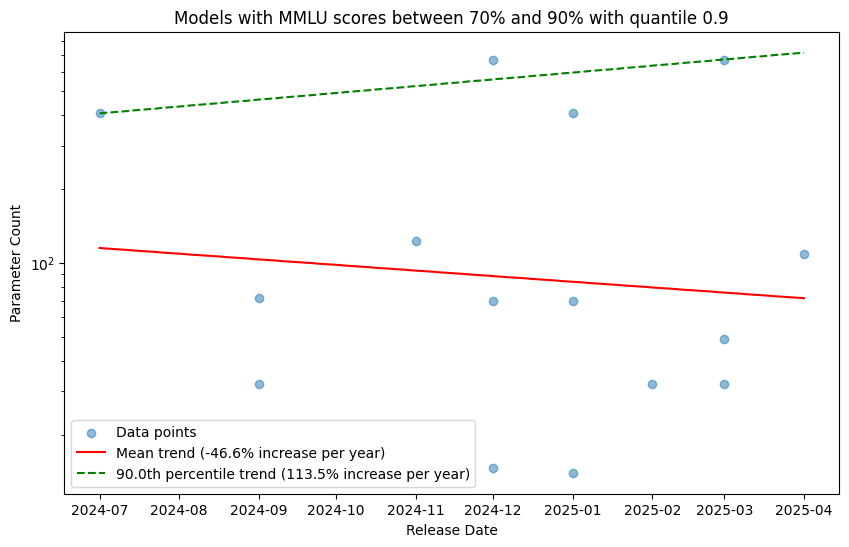

In [102]:
#look at modles with MMLU 70-90 graph parameter count over time 
# graph trend in parameter count for models with MMLU in certain range

df = pd.read_csv('art_analysis_scrape.csv')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Parameter Count'] = df['Parameter Count'].astype(float)  # Ensure parameter count is numeric
upper_level_gp =90
lower_level_gp = 70
quantile = 0.9
benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'
type = 'Open'
# type = 'Open'
df = df[df['License'] == type]

# Drop nan values
df = df[df[benchmark_feature].notna()]
df = df[df['Release Date'].notna()]
df = df[df['Parameter Count'].notna()]  # Ensure parameter count is not NaN

# Convert MMLU values to float - handle the case where values are already numeric
# First check if the values are strings or already numeric
if df[benchmark_feature].dtype == 'object':
    # If they're strings, remove the % sign and convert
    df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
else:
    # If they're already numeric, just ensure they're float type
    df[benchmark_feature] = df[benchmark_feature].astype(float)

# Filter based on MMLU
mmlu_df = df[(df[benchmark_feature] >= lower_level_gp) & 
             (df[benchmark_feature] <= upper_level_gp)]

# Convert dates to numeric format for regression
mmlu_df['Date_Numeric'] = pd.to_datetime(mmlu_df['Release Date']).map(datetime.toordinal)

# Take log of parameter counts for linear regression
param_counts = mmlu_df['Parameter Count']
# Filter out zeros and negative values before taking log
valid_params = param_counts[param_counts > 0]
mmlu_df_filtered = mmlu_df[param_counts > 0]
log_params = np.log(valid_params)

# Check for infinite values and remove them
mask = np.isfinite(log_params)
mmlu_df_filtered = mmlu_df_filtered[mask]
log_params = log_params[mask]

# Fit linear regression model
X = mmlu_df_filtered['Date_Numeric'].values.reshape(-1, 1)
y = log_params.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calculate percent increase per year
# The coefficient represents the change in log parameter count per day
daily_rate = model.coef_[0][0]
# Convert to yearly rate
yearly_rate = daily_rate * 365
# Convert log change to percent change: e^yearly_rate - 1
percent_change_per_year = (np.exp(yearly_rate) - 1) * 100

# Generate prediction line
date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
log_param_pred = model.predict(date_range)
param_pred = np.exp(log_param_pred)

# Fit quantile regression using sklearn
from sklearn.linear_model import QuantileRegressor

# Create and fit the quantile regression model
quant_model = QuantileRegressor(quantile=quantile, alpha=0)
quant_model.fit(X, y)  # Use the same X and y as linear regression

# Generate quantile regression prediction line
log_param_quant_pred = quant_model.predict(date_range)
param_quant_pred = np.exp(log_param_quant_pred)

# Calculate percent increase per year for quantile regression
daily_rate_quant = quant_model.coef_[0]  # Get coefficient from sklearn model
yearly_rate_quant = daily_rate_quant * 365
percent_change_per_year_quant = (np.exp(yearly_rate_quant) - 1) * 100

# Convert numeric dates back to datetime for plotting
date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

# Plot parameter count vs release date with trend line
plt.figure(figsize=(10, 6))
plt.scatter(mmlu_df_filtered['Release Date'], mmlu_df_filtered['Parameter Count'], alpha=0.5, label='Data points')
plt.plot(date_range_dt, param_pred, 'r-', label=f'Mean trend ({percent_change_per_year:.1f}% increase per year)')
plt.plot(date_range_dt, param_quant_pred, 'g--', label=f'{quantile*100}th percentile trend ({percent_change_per_year_quant:.1f}% increase per year)')
plt.xlabel('Release Date')
plt.ylabel('Parameter Count')
plt.yscale('log')
plt.title(f'Models with MMLU scores between {lower_level_gp}% and {upper_level_gp}% with quantile {quantile}')
plt.legend()


# More Price Comparisons
- look at fixed price and compare performance to best model
- compare perfomance of fixed parameter model on MMLU 

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/4122245435.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/4122245435.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Date_Numeric'] = pd.to_datetime(price_df['Release Date']).map(datetime.toordinal)
/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected

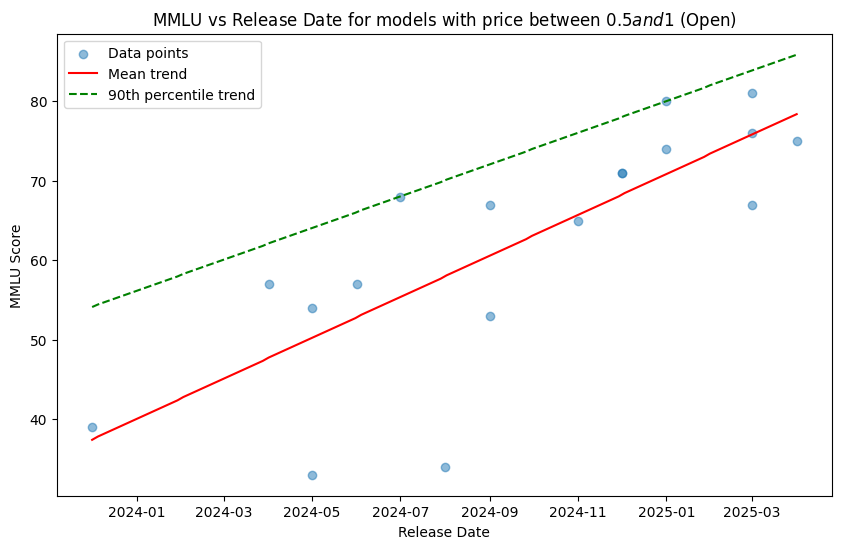

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/4122245435.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/4122245435.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Date_Numeric'] = pd.to_datetime(price_df['Release Date']).map(datetime.toordinal)
/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected

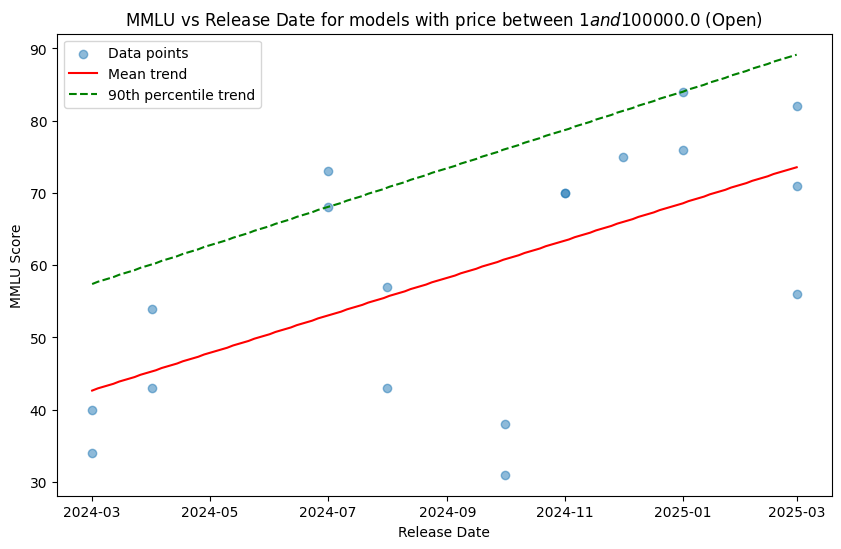

In [103]:
def plot_mmlu_vs_date_by_price(lower_price, upper_price, quantile=0.9, type='Open'):
    """
    Plots MMLU score vs. release date (month-level) for models with output price in a given range.
    Shows both mean and quantile regression trends.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime
    from sklearn.linear_model import LinearRegression, QuantileRegressor

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
    benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'
    df = df[df['License'] == type]

    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    df = df[df['Output Price\nUSD/1M Tokens'].notna()]

    # Convert MMLU values to float
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Filter based on price
    price_df = df[(df['Output Price\nUSD/1M Tokens'] >= lower_price) & 
                  (df['Output Price\nUSD/1M Tokens'] <= upper_price)]

    # Convert release date to numeric for regression (ordinal)
    price_df['Date_Numeric'] = pd.to_datetime(price_df['Release Date']).map(datetime.toordinal)

    # Prepare regression variables
    X = price_df['Date_Numeric'].values.reshape(-1, 1)
    y = price_df[benchmark_feature].values.reshape(-1, 1)

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    daily_rate = model.coef_[0][0]
    yearly_rate = daily_rate * 365
    # For reporting, you could print or return yearly_rate if desired

    # Generate prediction line
    date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    mmlu_pred = model.predict(date_range)

    # Fit quantile regression
    quant_model = QuantileRegressor(quantile=quantile, alpha=0)
    quant_model.fit(X, y)
    mmlu_quant_pred = quant_model.predict(date_range)

    # Convert numeric dates back to datetime for plotting
    date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(price_df['Release Date'], price_df[benchmark_feature], alpha=0.5, label='Data points')
    plt.plot(date_range_dt, mmlu_pred, 'r-', label='Mean trend')
    plt.plot(date_range_dt, mmlu_quant_pred, 'g--', label=f'{quantile*100:.0f}th percentile trend')
    plt.xlabel('Release Date')
    plt.ylabel('MMLU Score')
    plt.title(f'MMLU vs Release Date for models with price between ${lower_price} and ${upper_price} ({type})')
    plt.legend()
    plt.show()

# Example usage:
plot_mmlu_vs_date_by_price(0.5, 1, quantile=0.9, type='Open')
plot_mmlu_vs_date_by_price(1, 1e5, quantile=0.9, type='Open')
# Example usage:

# Compare Both at Same Time:

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/297807248.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hansgundlach/Documents/AllOtherResearch/NeelMaterial/othello/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


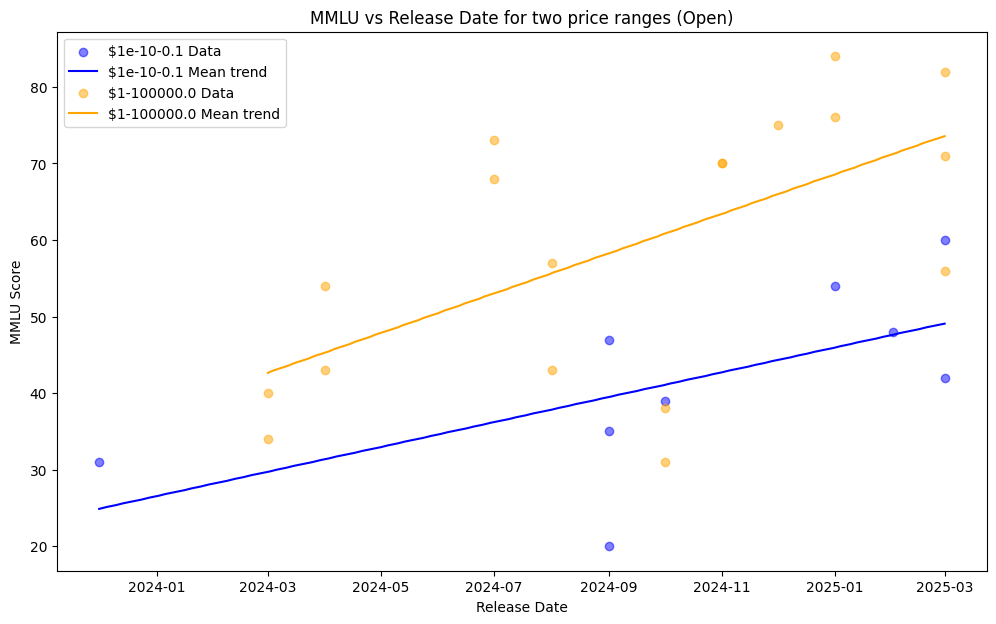

In [104]:
def compare_mmlu_vs_date_by_price(
    lower_price_1, upper_price_1, 
    lower_price_2, upper_price_2, 
    quantile=0.9, type='Open'
):
    """
    Plots MMLU score vs. release date for two price ranges on the same graph for comparison.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime
    from sklearn.linear_model import LinearRegression, QuantileRegressor

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
    benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'
    df = df[df['License'] == type]

    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    df = df[df['Output Price\nUSD/1M Tokens'].notna()]

    # Convert MMLU values to float
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Helper function to get regression lines for a price range
    def get_regression_lines(lower_price, upper_price, color, label_prefix):
        price_df = df[(df['Output Price\nUSD/1M Tokens'] >= lower_price) & 
                      (df['Output Price\nUSD/1M Tokens'] <= upper_price)].copy()
        price_df['Date_Numeric'] = pd.to_datetime(price_df['Release Date']).map(datetime.toordinal)
        X = price_df['Date_Numeric'].values.reshape(-1, 1)
        y = price_df[benchmark_feature].values.reshape(-1, 1)
        if len(X) < 2:
            return None  # Not enough data
        # Linear regression
        model = LinearRegression()
        model.fit(X, y)
        date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        mmlu_pred = model.predict(date_range)
        # Quantile regression
        quant_model = QuantileRegressor(quantile=quantile, alpha=0)
        quant_model.fit(X, y)
        mmlu_quant_pred = quant_model.predict(date_range)
        date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]
        # Plot
        plt.scatter(price_df['Release Date'], price_df[benchmark_feature], alpha=0.5, label=f'{label_prefix} Data', color=color)
        plt.plot(date_range_dt, mmlu_pred, color=color, linestyle='-', label=f'{label_prefix} Mean trend')
        # plt.plot(date_range_dt, mmlu_quant_pred, color=color, linestyle='--', label=f'{label_prefix} {quantile*100:.0f}th percentile')
        return True

    plt.figure(figsize=(12, 7))
    got1 = get_regression_lines(lower_price_1, upper_price_1, 'blue', f'${lower_price_1}-{upper_price_1}')
    got2 = get_regression_lines(lower_price_2, upper_price_2, 'orange', f'${lower_price_2}-{upper_price_2}')
    plt.xlabel('Release Date')
    plt.ylabel('MMLU Score')
    plt.title(f'MMLU vs Release Date for two price ranges ({type})')
    plt.legend()
    plt.show()
    if not got1:
        print(f"Not enough data for price range ${lower_price_1}-{upper_price_1}")
    if not got2:
        print(f"Not enough data for price range ${lower_price_2}-{upper_price_2}")

# Example usage:
compare_mmlu_vs_date_by_price(1e-10, 0.1, 1, 1e5, quantile=0.9, type='Open')

# Best vs Fixed Price Range

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/3887297302.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


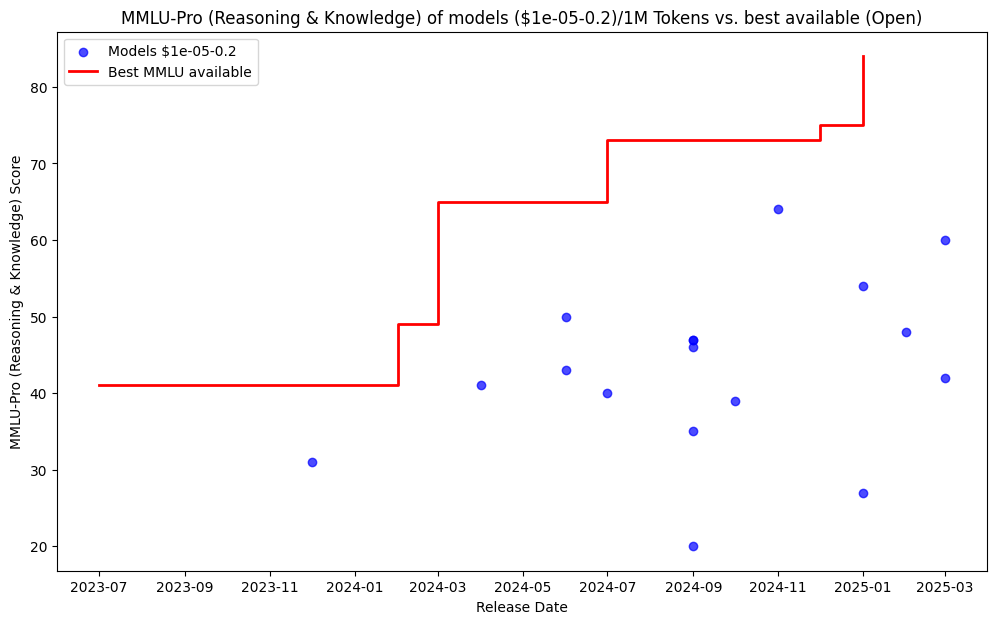

In [105]:
def compare_mmlu_to_best_over_time(lower_price, upper_price, type='Open'):
    """
    Plots MMLU performance of models within a fixed price range vs. the best MMLU available at each release date.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
    benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'
    df = df[df['License'] == type]

    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    df = df[df['Output Price\nUSD/1M Tokens'].notna()]

    # Convert MMLU values to float
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Sort by release date
    df = df.sort_values('Release Date')

    # Compute best MMLU available up to each date
    df['Best_MMLU_So_Far'] = df[benchmark_feature].cummax()

    # For plotting the best-available line, drop duplicates to get step points
    best_mmlu_df = df[['Release Date', 'Best_MMLU_So_Far']].drop_duplicates(subset='Best_MMLU_So_Far')

    # Filter models in the price range
    price_df = df[(df['Output Price\nUSD/1M Tokens'] >= lower_price) & 
                  (df['Output Price\nUSD/1M Tokens'] <= upper_price)]

    # Plot
    plt.figure(figsize=(12, 7))
    plt.scatter(price_df['Release Date'], price_df[benchmark_feature], alpha=0.7, color='blue', label=f'Models ${lower_price}-{upper_price}')
    plt.step(best_mmlu_df['Release Date'], best_mmlu_df['Best_MMLU_So_Far'], where='post', color='red', linewidth=2, label='Best MMLU available')
    plt.xlabel('Release Date')
    plt.ylabel(f'{benchmark_feature} Score')
    plt.title(f'{benchmark_feature} of models (${lower_price}-{upper_price})/1M Tokens vs. best available ({type})')
    plt.legend()
    plt.show()

# Example usage:
compare_mmlu_to_best_over_time(0.00001, 0.2, type='Open')

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/3338909683.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


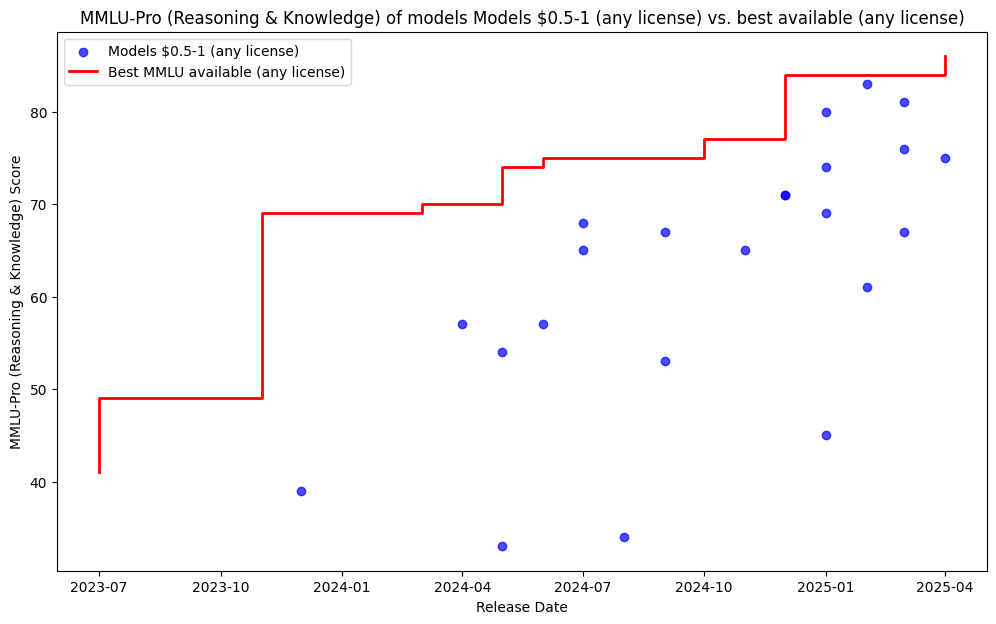

In [106]:
def compare_mmlu_to_best_over_time_any_license(lower_price, upper_price, type=None):
    """
    Plots MMLU performance of models within a fixed price range (optionally filtered by license)
    vs. the best MMLU available at each release date (regardless of license).
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
    benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'
    # benchmark_feature = "Chatbot Arena"

    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    df = df[df['Output Price\nUSD/1M Tokens'].notna()]

    # Convert MMLU values to float
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Sort by release date
    df = df.sort_values('Release Date')

    # Compute best MMLU available up to each date (across all licenses)
    df['Best_MMLU_So_Far'] = df[benchmark_feature].cummax()
    best_mmlu_df = df[['Release Date', 'Best_MMLU_So_Far']].drop_duplicates(subset='Best_MMLU_So_Far')

    # Filter models in the price range (optionally by license)
    if type is not None:
        price_df = df[(df['Output Price\nUSD/1M Tokens'] >= lower_price) & 
                      (df['Output Price\nUSD/1M Tokens'] <= upper_price) &
                      (df['License'] == type)]
        label = f'Models ${lower_price}-{upper_price} ({type})'
    else:
        price_df = df[(df['Output Price\nUSD/1M Tokens'] >= lower_price) & 
                      (df['Output Price\nUSD/1M Tokens'] <= upper_price)]
        label = f'Models ${lower_price}-{upper_price} (any license)'

    # Plot
    plt.figure(figsize=(12, 7))
    plt.scatter(price_df['Release Date'], price_df[benchmark_feature], alpha=0.7, color='blue', label=label)
    plt.step(best_mmlu_df['Release Date'], best_mmlu_df['Best_MMLU_So_Far'], where='post', color='red', linewidth=2, label='Best MMLU available (any license)')
    plt.xlabel('Release Date')
    plt.ylabel(f'{benchmark_feature} Score')
    plt.title(f'{benchmark_feature} of models {label} vs. best available (any license)')
    plt.legend()
    plt.show()

# Example usage:
compare_mmlu_to_best_over_time_any_license(0.5, 1)  # all licenses in price range
# or, to filter price range by license:
# compare_mmlu_to_best_over_time_any_license(0.5, 1, type='Open')

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_57345/3659254213.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


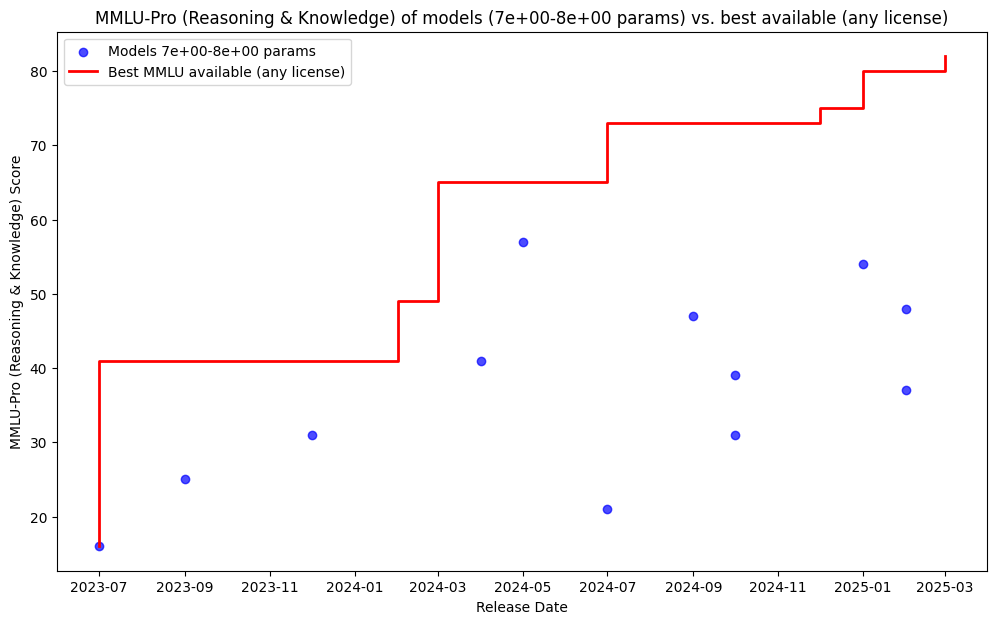

In [107]:
def compare_mmlu_to_best_over_time_by_param_count(lower_param, upper_param):
    """
    Plots MMLU performance of models within a fixed parameter count range
    vs. the best MMLU available at each release date (regardless of license).
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import datetime

    df = pd.read_csv('art_analysis_scrape.csv')
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Parameter Count'] = pd.to_numeric(df['Parameter Count'], errors='coerce')
    benchmark_feature = 'MMLU-Pro (Reasoning & Knowledge)'
    # benchmark_feature = "Chatbot Arena"

    # Drop nan values
    df = df[df[benchmark_feature].notna()]
    df = df[df['Release Date'].notna()]
    df = df[df['Parameter Count'].notna()]

    # Convert MMLU values to float
    if df[benchmark_feature].dtype == 'object':
        df[benchmark_feature] = df[benchmark_feature].str.replace('%', '').astype(float)
    else:
        df[benchmark_feature] = df[benchmark_feature].astype(float)

    # Sort by release date
    df = df.sort_values('Release Date')

    # Compute best MMLU available up to each date (across all models)
    df['Best_MMLU_So_Far'] = df[benchmark_feature].cummax()
    best_mmlu_df = df[['Release Date', 'Best_MMLU_So_Far']].drop_duplicates(subset='Best_MMLU_So_Far')

    # Filter models in the parameter count range
    param_df = df[(df['Parameter Count'] >= lower_param) & 
                  (df['Parameter Count'] <= upper_param)]

    # Plot
    plt.figure(figsize=(12, 7))
    plt.scatter(param_df['Release Date'], param_df[benchmark_feature], alpha=0.7, color='blue', label=f'Models {lower_param:.0e}-{upper_param:.0e} params')
    plt.step(best_mmlu_df['Release Date'], best_mmlu_df['Best_MMLU_So_Far'], where='post', color='red', linewidth=2, label='Best MMLU available (any license)')
    plt.xlabel('Release Date')
    plt.ylabel(f'{benchmark_feature} Score')
    plt.title(f'{benchmark_feature} of models ({lower_param:.0e}-{upper_param:.0e} params) vs. best available (any license)')
    plt.legend()
    plt.show()

# Example usage:
compare_mmlu_to_best_over_time_by_param_count(6.9, 8.1)

# Pecent Decrease For Proprietary Models

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_4185/3391937126.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)


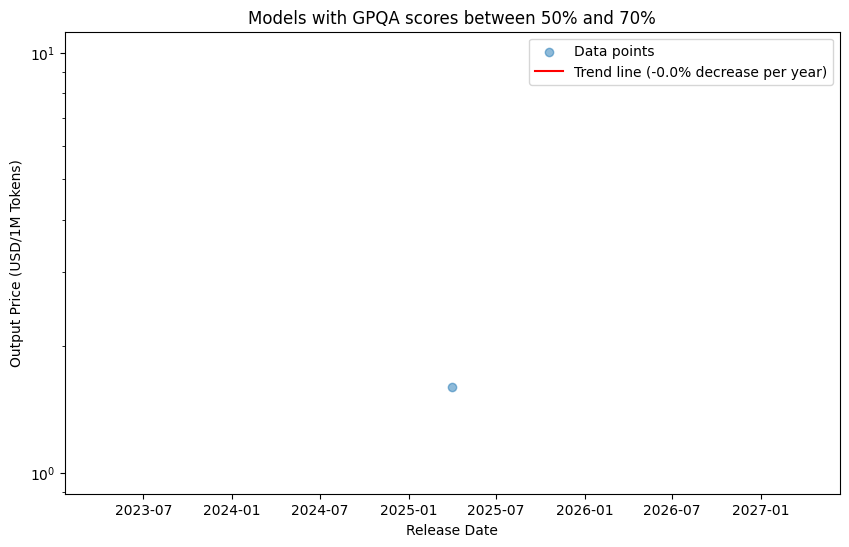

In [ ]:
# graph trend in price for models with GPQA in certain range
upper_level_gp = 70
lower_level_gp = 50

proprietary_df = proprietary_df
# Drop nan values
proprietary_df = proprietary_df[proprietary_df['GPQA Diamond (Scientific Reasoning)'].notna()]

# Convert GPQA values to float - handle the case where values are already numeric
# First check if the values are strings or already numeric
if proprietary_df['GPQA Diamond (Scientific Reasoning)'].dtype == 'object':
    # If they're strings, remove the % sign and convert
    proprietary_df['GPQA Diamond (Scientific Reasoning)'] = proprietary_df['GPQA Diamond (Scientific Reasoning)'].str.replace('%', '').astype(float)
else:
    # If they're already numeric, just ensure they're float type
    proprietary_df['GPQA Diamond (Scientific Reasoning)'] = proprietary_df['GPQA Diamond (Scientific Reasoning)'].astype(float)

# Filter based on GPQA - fix the logical operator (use 'and' or '&' with parentheses)
gpqa_df = proprietary_df[(proprietary_df['GPQA Diamond (Scientific Reasoning)'] >= lower_level_gp) & 
             (proprietary_df['GPQA Diamond (Scientific Reasoning)'] <= upper_level_gp)]

# Convert release date to numeric for regression


# Convert dates to numeric format for regression
gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

# Take log of prices for linear regression, handling zeros and infinities
output_prices = gpqa_df['Output Price\nUSD/1M Tokens']
# Filter out zeros and negative values before taking log
valid_prices = output_prices[output_prices > 0]
gpqa_df_filtered = gpqa_df[output_prices > 0]
log_prices = np.log(valid_prices)

# Check for infinite values and remove them
mask = np.isfinite(log_prices)
gpqa_df_filtered = gpqa_df_filtered[mask]
log_prices = log_prices[mask]

# Fit linear regression model
X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
y = log_prices.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calculate percent decrease per year
# The coefficient represents the change in log price per day
daily_rate = model.coef_[0][0]
# Convert to yearly rate
yearly_rate = daily_rate * 365
# Convert log change to percent change: e^yearly_rate - 1
percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
# Since we expect a decrease, make it positive for reporting
percent_decrease_per_year = -percent_change_per_year

# Generate prediction line
date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
log_price_pred = model.predict(date_range)
price_pred = np.exp(log_price_pred)

# Convert numeric dates back to datetime for plotting
date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

# Plot output price vs release date for gpqa_df with trend line
plt.figure(figsize=(10, 6))
plt.scatter(gpqa_df_filtered['Release Date'], gpqa_df_filtered['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Data points')
plt.plot(date_range_dt, price_pred, 'r-', label=f'Trend line ({percent_decrease_per_year:.1f}% decrease per year)')
plt.xlabel('Release Date')
plt.ylabel('Output Price (USD/1M Tokens)')
plt.yscale('log')
plt.title(f'Models with GPQA scores between {lower_level_gp}% and {upper_level_gp}%')
plt.legend()

# Open Source Models

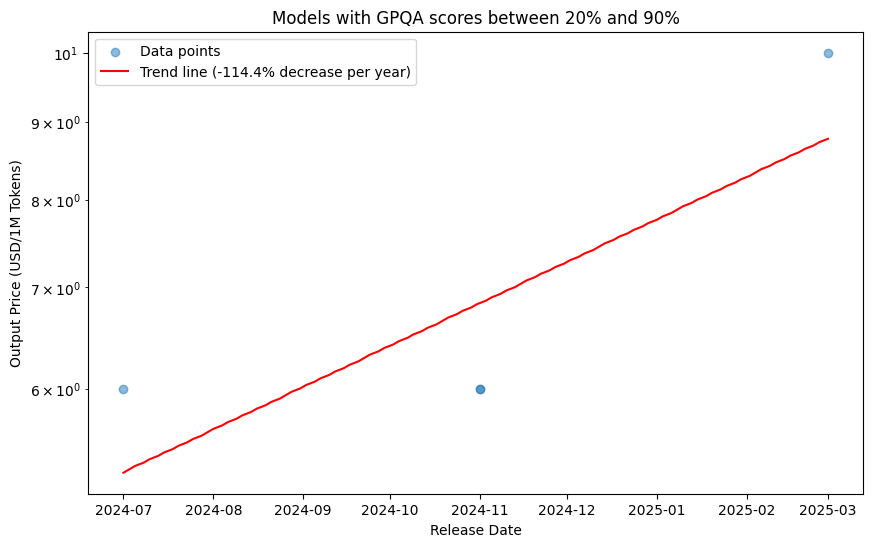

In [112]:
# graph trend in price for models with GPQA in certain range
upper_level_gp = 90
lower_level_gp = 20
#open source models

# Drop nan values
open_license_df = open_license_df[open_license_df['GPQA Diamond (Scientific Reasoning)'].notna()]

# Convert GPQA values to float - handle the case where values are already numeric
# First check if the values are strings or already numeric
if open_license_df['GPQA Diamond (Scientific Reasoning)'].dtype == 'object':
    # If they're strings, remove the % sign and convert
    open_license_df['GPQA Diamond (Scientific Reasoning)'] = open_license_df['GPQA Diamond (Scientific Reasoning)'].str.replace('%', '').astype(float)
else:
    # If they're already numeric, just ensure they're float type
    open_license_df['GPQA Diamond (Scientific Reasoning)'] = open_license_df['GPQA Diamond (Scientific Reasoning)'].astype(float)

# Filter based on GPQA - fix the logical operator (use 'and' or '&' with parentheses)
gpqa_df = open_license_df[(open_license_df['GPQA Diamond (Scientific Reasoning)'] >= lower_level_gp) & 
             (open_license_df['GPQA Diamond (Scientific Reasoning)'] <= upper_level_gp)]

# Convert release date to numeric for regression

# Convert dates to numeric format for regression
gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

# Take log of prices for linear regression, handling zeros and infinities
output_prices = gpqa_df['Output Price\nUSD/1M Tokens']
# Filter out zeros and negative values before taking log
valid_prices = output_prices[output_prices > 0]
gpqa_df_filtered = gpqa_df[output_prices > 0]
log_prices = np.log(valid_prices)

# Check for infinite values and remove them
mask = np.isfinite(log_prices)
gpqa_df_filtered = gpqa_df_filtered[mask]
log_prices = log_prices[mask]

# Fit linear regression model
X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
y = log_prices.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calculate percent decrease per year
# The coefficient represents the change in log price per day
daily_rate = model.coef_[0][0]
# Convert to yearly rate
yearly_rate = daily_rate * 365
# Convert log change to percent change: e^yearly_rate - 1
percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
# Since we expect a decrease, make it positive for reporting
percent_decrease_per_year = -percent_change_per_year

# Generate prediction line
date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
log_price_pred = model.predict(date_range)
price_pred = np.exp(log_price_pred)

# Convert numeric dates back to datetime for plotting
date_range_dt = [datetime.fromordinal(int(d)) for d in date_range.flatten()]

# Plot output price vs release date for gpqa_df with trend line
plt.figure(figsize=(10, 6))
plt.scatter(gpqa_df_filtered['Release Date'], gpqa_df_filtered['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Data points')
plt.plot(date_range_dt, price_pred, 'r-', label=f'Trend line ({percent_decrease_per_year:.1f}% decrease per year)')
plt.xlabel('Release Date')
plt.ylabel('Output Price (USD/1M Tokens)')
plt.yscale('log')
plt.title(f'Models with GPQA scores between {lower_level_gp}% and {upper_level_gp}%')
plt.legend()

# Proprietary Model Trends

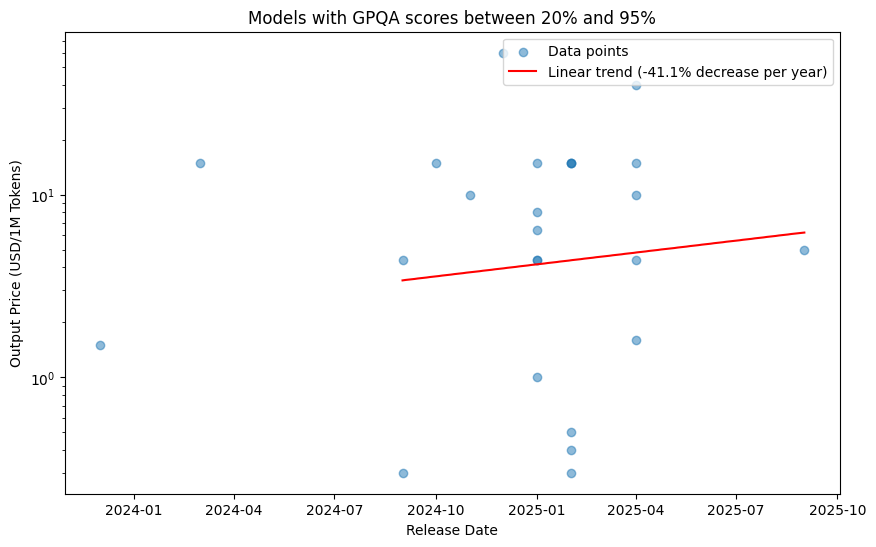

In [81]:


# Parameters for GPQA filter
upper_level_gp = 95
lower_level_gp = 20
quantile = 0.95

# Drop nan values
proprietary_df = proprietary_df[proprietary_df['GPQA Diamond (Scientific Reasoning)'].notna()]

# Convert GPQA values to float
if proprietary_df['GPQA Diamond (Scientific Reasoning)'].dtype == 'object':
    proprietary_df['GPQA Diamond (Scientific Reasoning)'] = (
        proprietary_df['GPQA Diamond (Scientific Reasoning)']
        .str.replace('%', '', regex=False)
        .astype(float)
    )
else:
    proprietary_df['GPQA Diamond (Scientific Reasoning)'] = proprietary_df['GPQA Diamond (Scientific Reasoning)'].astype(float)

# Filter based on GPQA
gpqa_df = proprietary_df[
    (proprietary_df['GPQA Diamond (Scientific Reasoning)'] >= lower_level_gp) &
    (proprietary_df['GPQA Diamond (Scientific Reasoning)'] <= upper_level_gp)
]

# Define price column name
price_col = 'Output Price\nUSD/1M Tokens'

# Convert release date to numeric for regression
gpqa_df['Date_Numeric'] = pd.to_datetime(gpqa_df['Release Date']).map(datetime.toordinal)

# Prepare price data for log transformation
output_prices = gpqa_df[price_col]
valid_mask = output_prices > 0
gpqa_df_filtered = gpqa_df[valid_mask].copy()
log_prices = np.log(output_prices[valid_mask])

# Remove infinite values
mask = np.isfinite(log_prices)
gpqa_df_filtered = gpqa_df_filtered[mask]
log_prices = log_prices[mask]

# Linear regression on log-prices
X = gpqa_df_filtered['Date_Numeric'].values.reshape(-1, 1)
y = log_prices.values.reshape(-1, 1)
lin_model = LinearRegression()
lin_model.fit(X, y)

daily_rate = lin_model.coef_[0][0]
yearly_rate = daily_rate * 365
percent_change_per_year = (np.exp(yearly_rate) - 1) * 100
percent_decrease_per_year = -percent_change_per_year

# Prediction line for linear regression
date_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
log_price_pred = lin_model.predict(date_range)
price_pred = np.exp(log_price_pred)





# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(
    gpqa_df_filtered['Release Date'],
    gpqa_df_filtered[price_col],
    alpha=0.5,
    label='Data points'
)
plt.plot(
    date_range_dt,
    price_pred,
    'r-',
    label=f'Linear trend ({percent_decrease_per_year:.1f}% decrease per year)'
)
plt.xlabel('Release Date')
plt.ylabel('Output Price (USD/1M Tokens)')
plt.yscale('log')
plt.title(f'Models with GPQA scores between {lower_level_gp}% and {upper_level_gp}%')
plt.legend()
plt.show()
